
# Project 1: Comprehensive Regression Analysis
### Course: Introduction to Machine Learning

This notebook is designed to guide you through a comprehensive regression analysis using various techniques. You will explore different methods, implement regularization techniques, and evaluate the performance of your models using various metrics and computational time.


## Submission Instructions

Once you are finished, follow these steps:

Make sure you have provided the team name, name of team members with IDs.

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end. Double check that there is a number next to each code cell and that these numbers are in order. Then, submit your project as follows:

Go to File > Print > Save as PDF. Double check that the entire notebook, from beginning to end, is in this PDF file. Upload the PDF and the notebook to Google Classroom.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Team Name: TEAM ASPIRERS
### Name and ID of Member 1: PARTHA METE, B2430052
### Name and ID of Member 2: SUDAM KUMAR PAUL, B2430063

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Add all other libraries you would require
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, mean_squared_log_error
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from tabulate import tabulate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import time
from tqdm import tqdm


## 1. Load the Dataset
**Instruction:** Load the chosen dataset and display its basic information and statistics. You may use any well-known dataset.

In [ ]:
# Loading a particular dataset
df=pd.read_csv('/content/drive/My Drive/gt_2015.csv')

# Display the first few rows of the dataset
df.head(30)

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0   1.953200  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1   1.219100  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2   0.949150  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3   1.007500  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4   1.285800  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   
5   1.831900  1021.7  76.411  2.8410  23.495  1076.4  549.92  133.58  11.829   
6   2.074000  1022.0  75.974  2.7981  22.945  1073.7  549.98  131.53  11.687   
7   1.782400  1022.6  73.535  2.8327  23.337  1075.7  550.01  133.18  11.745   
8   1.593000  1023.2  72.873  2.8729  23.654  1078.5  550.06  135.38  11.772   
9   1.681900  1023.8  72.441  2.9058  23.463  1077.9  550.12  134.86  11.742   
10  1.900200  1024.5  71.376  2.9126  23.562  1078.2  550.12  134.98  11.770   
11  1.779700  1025.1  68.528  2.8725  23.276  1077.0  550.03  134.21  11.782   
12  1.172200  1025.3  65.626  2.8500  23.215  1077.3  550.09  134.44  11.873   
13  0.723270  1025.4  64.393  2.8395  23.101  1076.2  550.15  133.82  11.797   
14  0.483480  1025.8  64.144  2.8746  23.299  1078.2  549.96  135.36  11.897   
15  0.429530  1025.9  64.504  2.8660  23.069  1077.0  549.73  134.47  11.805   
16  0.482380  1026.1  63.519  2.5481  20.185  1037.1  535.40  115.92  10.860   
17  0.059447  1026.0  52.124  2.4651  18.478  1048.4  548.78  111.20  10.384   
18 -0.215980  1026.7  51.978  2.5301  19.438  1050.4  546.71  115.46  10.767   
19  0.016700  1026.8  54.805  3.3399  27.408  1085.6  540.72  148.05  12.790   
20  0.684810  1026.7  56.029  4.0703  34.213  1100.0  527.71  168.83  14.358   
21  1.999500  1026.3  54.000  3.9830  34.171  1100.1  530.64  166.13  14.182   
22  3.166300  1025.7  51.350  4.0683  35.162  1099.8  528.21  167.49  14.384   
23  3.648600  1025.3  51.649  4.0375  35.282  1100.0  530.04  165.89  14.257   
24  3.920700  1025.2  49.619  4.0455  34.648  1099.9  529.73  166.00  14.253   
25  3.919300  1025.1  51.181  4.0400  33.944  1100.0  529.56  166.46  14.283   
26  3.096500  1024.8  55.350  4.0750  33.873  1099.8  528.24  167.79  14.342   
27  1.759600  1024.7  63.278  3.9926  33.249  1100.0  529.91  167.49  14.195   
28  0.938670  1024.8  65.617  4.0298  33.488  1100.1  528.95  168.31  14.312   
29  0.507130  1024.6  66.254  4.0629  33.794  1100.0  528.12  169.09  14.401   

         CO      NOX  
0    7.4491  113.250  
1    6.4684  112.020  
2    3.6335   88.147  
3    3.1972   87.078  
4    2.3833   82.515  
5    2.0812   81.193  
6    2.2529   83.171  
7    3.7350   85.749  
8    3.6398   86.491  
9    3.5866   86.328  
10   3.5605   84.117  
11   3.6902   85.317  
12   3.1766   86.431  
13   2.5620   84.708  
14   2.1854   84.104  
15   2.4286   83.869  
16  12.6590  118.270  
17   4.6896  104.560  
18   7.0983  116.960  
19   3.8632   75.640  
20   2.9790   59.354  
21   2.5793   59.432  
22   2.2228   58.432  
23   2.2119   60.172  
24   2.3487   60.255  
25   2.3095   59.778  
26   2.3450   60.011  
27   2.5317   60.746  
28   2.6109   60.902  
29   2.5376   60.859

In [ ]:
# Step 3: Display full forms of features
feature_units = [
    ['AT', 'Ambient Temperature', 'Celsius'],
    ['AP', 'Ambient Pressure', 'mbar'],
    ['AH', 'Ambient Humidity', '%'],
    ['AFDP', 'Air Filter Difference Pressure', 'mbar'],
    ['GTEP', 'Gas Turbine Exhaust Pressure', 'mbar'],
    ['TIT', 'Turbine Inlet Temperature', 'Celsius'],
    ['TAT', 'Turbine After Temperature', 'Celsius'],
    ['TEY', 'Turbine Energy Yield (Target)', 'MWh'],
    ['CDP', 'Compressor Discharge Pressure', 'mbar'],
    ['CO', 'Carbon Monoxide Content', 'mg/m³'],
    ['NOX', 'Nitrogen Oxides Content', 'mg/m³'],
]

print(tabulate(feature_units, headers=["Column", "Description", "Units"], tablefmt="fancy_grid"))

╒══════════╤════════════════════════════════╤═════════╕
│ Column   │ Description                    │ Units   │
╞══════════╪════════════════════════════════╪═════════╡
│ AT       │ Ambient Temperature            │ Celsius │
├──────────┼────────────────────────────────┼─────────┤
│ AP       │ Ambient Pressure               │ mbar    │
├──────────┼────────────────────────────────┼─────────┤
│ AH       │ Ambient Humidity               │ %       │
├──────────┼────────────────────────────────┼─────────┤
│ AFDP     │ Air Filter Difference Pressure │ mbar    │
├──────────┼────────────────────────────────┼─────────┤
│ GTEP     │ Gas Turbine Exhaust Pressure   │ mbar    │
├──────────┼────────────────────────────────┼─────────┤
│ TIT      │ Turbine Inlet Temperature      │ Celsius │
├──────────┼────────────────────────────────┼─────────┤
│ TAT      │ Turbine After Temperature      │ Celsius │
├──────────┼────────────────────────────────┼─────────┤
│ TEY      │ Turbine Energy Yield (Target)  │ MW

## 2. Data Preprocessing



> Instruction: Perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling features if required.



## EDA

In [ ]:
# Step 4: Dataset shape and info
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (7384, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB
None


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


In [ ]:
df.describe()

AT          AP           AH         AFDP         GTEP  \
count  7384.000000  7384.00000  7384.000000  7384.000000  7384.000000   
mean     17.225259  1014.50911    68.647464     3.598909    26.130149   
std       8.095783     6.89543    13.541116     0.610226     4.473737   
min      -6.234800   989.40000    24.085000     2.368800    17.698000   
25%      11.073250  1009.67500    59.447250     3.117300    23.147000   
50%      17.456500  1014.00000    70.952000     3.538500    25.331000   
75%      23.684750  1018.30000    79.653750     4.194825    30.018250   
max      37.103000  1036.60000    96.666000     5.239500    40.716000   

               TIT          TAT          TEY          CDP           CO  \
count  7384.000000  7384.000000  7384.000000  7384.000000  7384.000000   
mean   1078.974689   546.642484   133.993380    12.097025     3.129986   
std      19.762449     5.489066    16.179208     1.136601     2.234962   
min    1016.000000   516.040000   100.020000     9.870800     0.212800   
25%    1070.500000   544.747500   126.255000    11.465750     1.808175   
50%    1080.300000   549.720000   131.600000    11.933000     2.533400   
75%    1099.900000   550.030000   147.160000    13.148000     3.702550   
max    1100.400000   550.590000   179.500000    15.159000    41.097000   

               NOX  
count  7384.000000  
mean     59.890509  
std      11.132464  
min      25.905000  
25%      52.399000  
50%      56.838500  
75%      65.093250  
max     119.680000



> Correlation Map


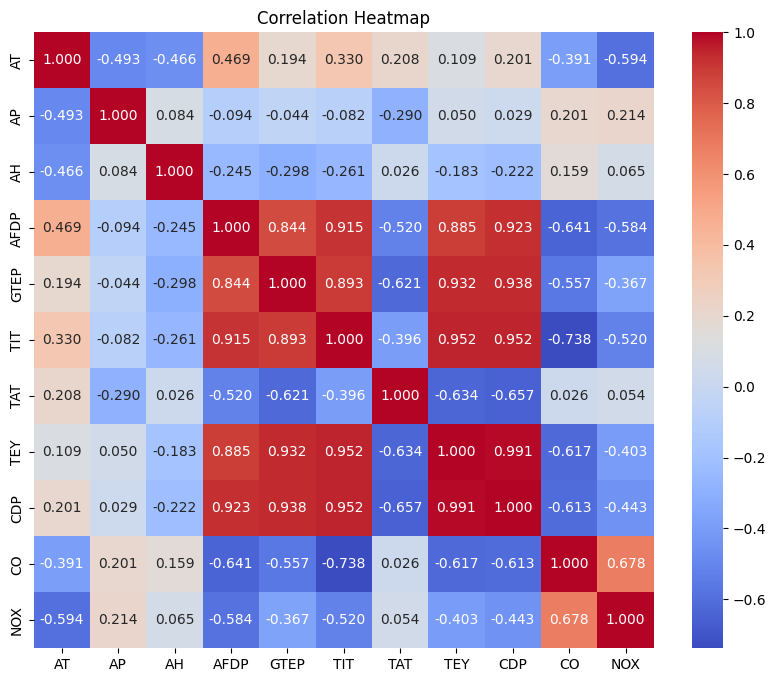

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()



> Multicolinearity



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Drop target column to keep only features
X = df.drop(columns=['TEY'])

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif_data)

  Feature         VIF
0      AT    6.273450
1      AP    1.654196
2      AH    2.037720
3    AFDP   19.900118
4    GTEP   10.466725
5     TIT  414.476920
6     TAT   68.454954
7     CDP  581.428160
8      CO    3.766694
9     NOX    3.123017


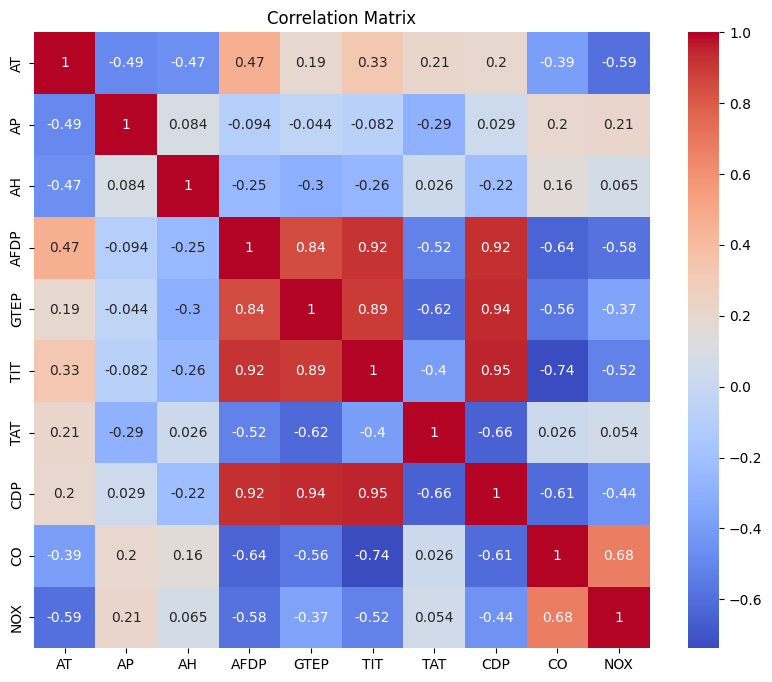

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
features = df.columns

for col in features:
    plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>



> Distribution of All Features



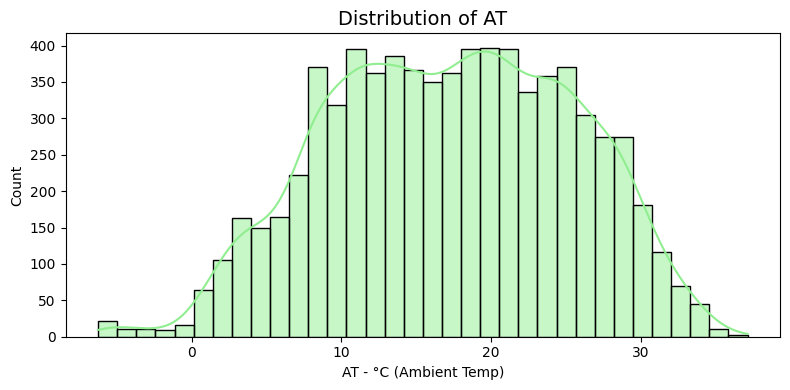

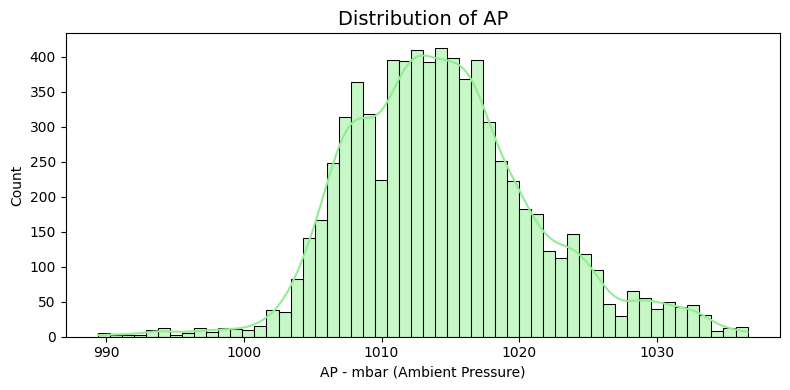

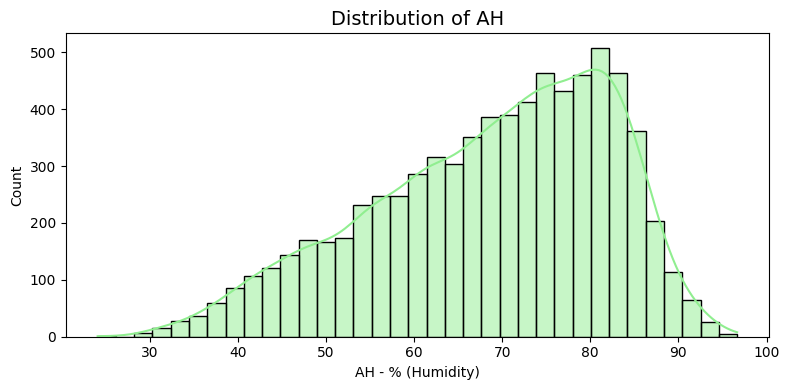

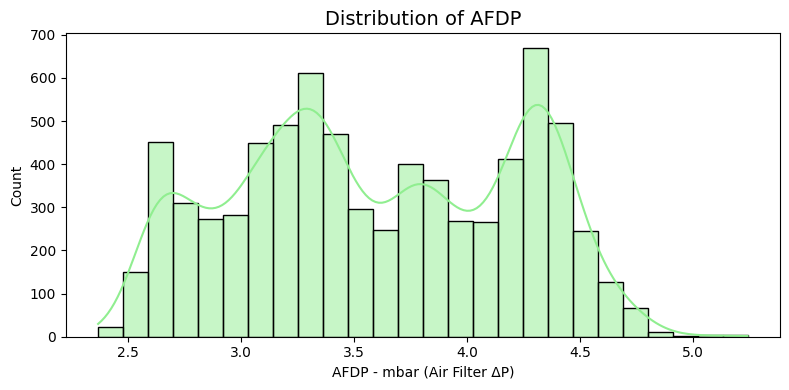

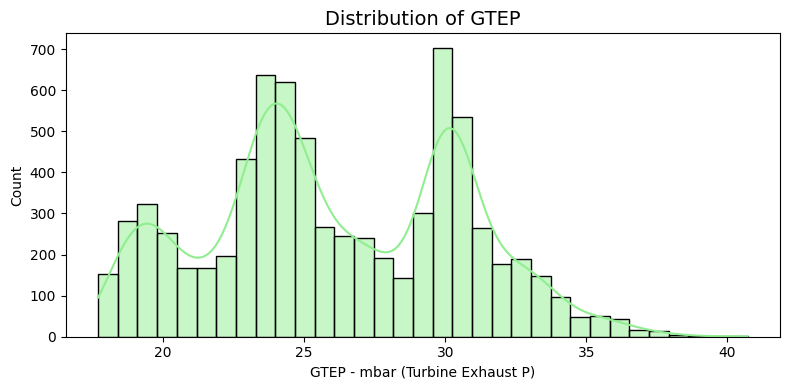

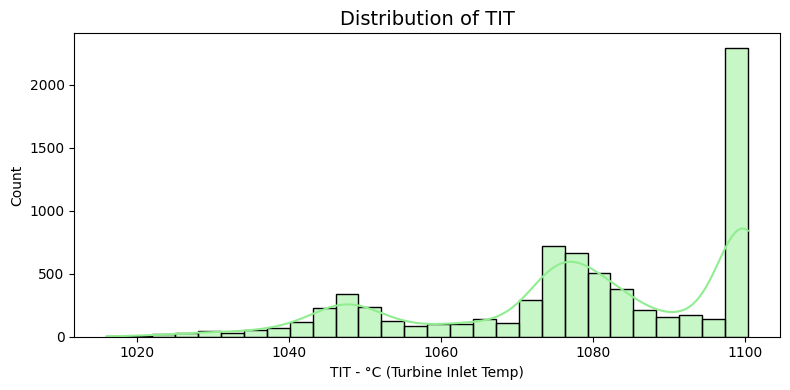

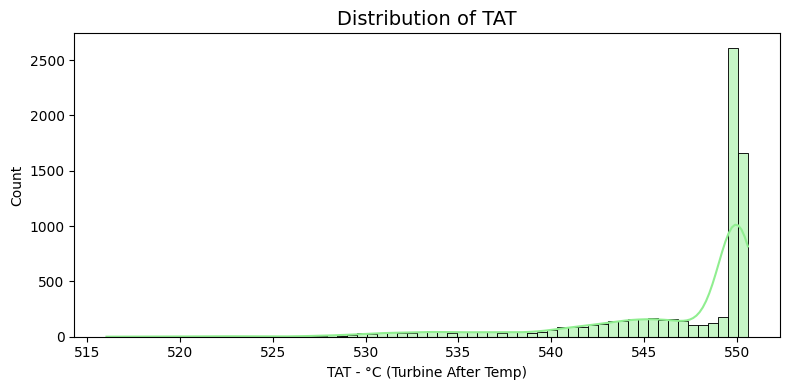

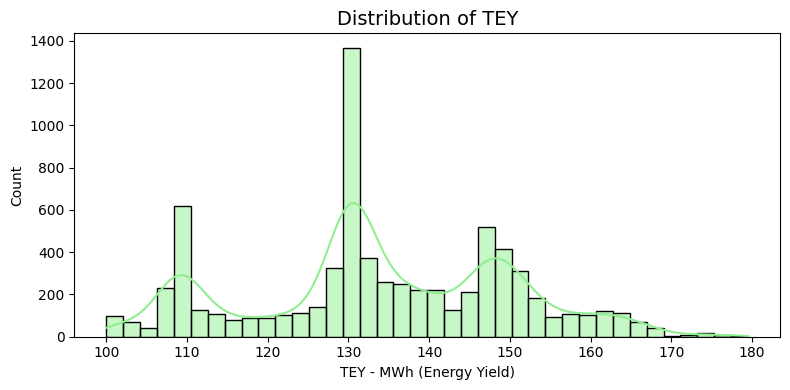

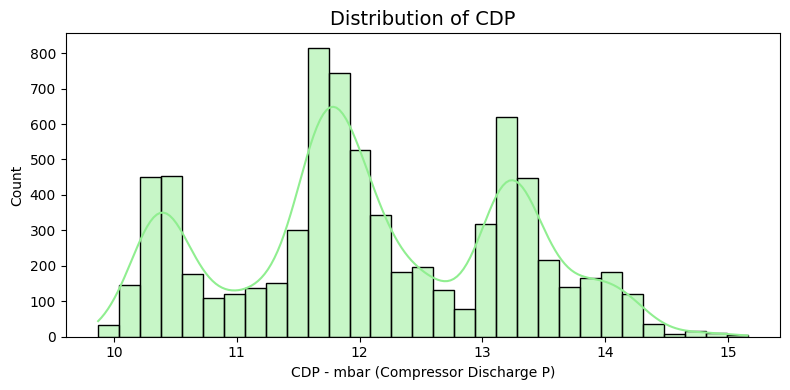

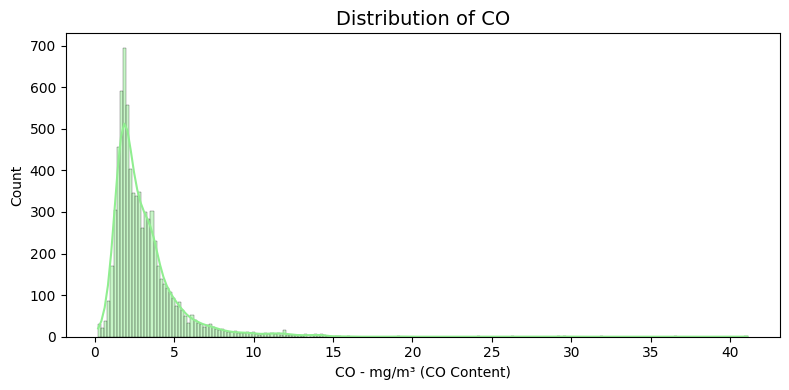

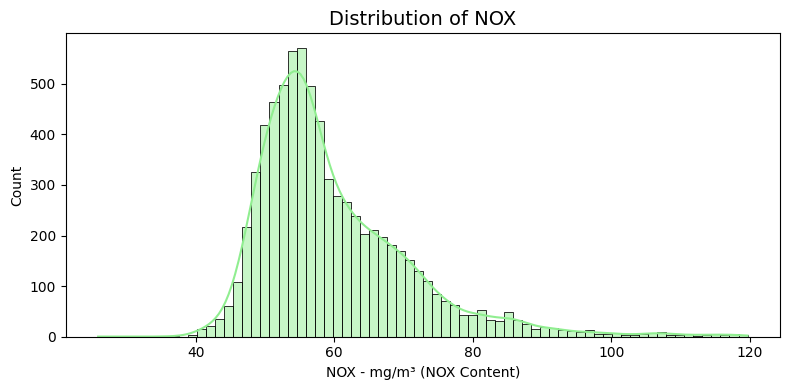

In [ ]:
# Feature → Units
feature_units = {
    'AT': '°C (Ambient Temp)',
    'AP': 'mbar (Ambient Pressure)',
    'AH': '% (Humidity)',
    'AFDP': 'mbar (Air Filter ΔP)',
    'GTEP': 'mbar (Turbine Exhaust P)',
    'TIT': '°C (Turbine Inlet Temp)',
    'TAT': '°C (Turbine After Temp)',
    'TEY': 'MWh (Energy Yield)',
    'CDP': 'mbar (Compressor Discharge P)',
    'CO': 'mg/m³ (CO Content)',
    'NOX': 'mg/m³ (NOX Content)'
}

# Histograms only
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(f'{col} - {feature_units.get(col, "")}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()




> Boxplot for handing Outliers



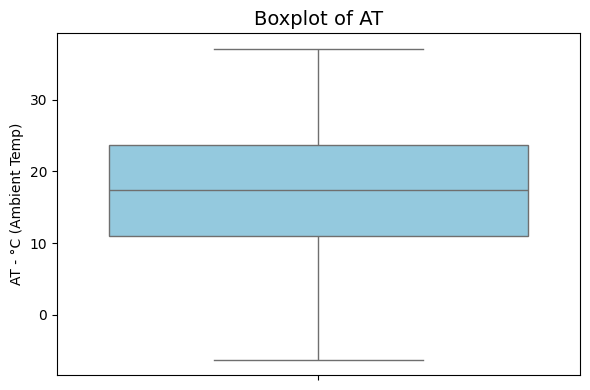

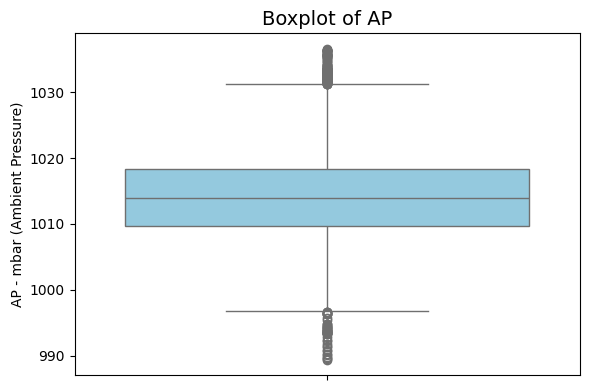

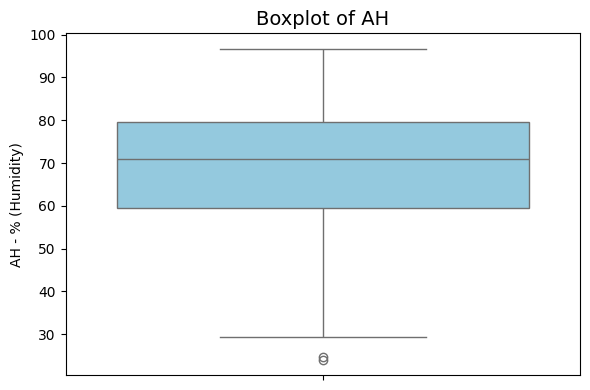

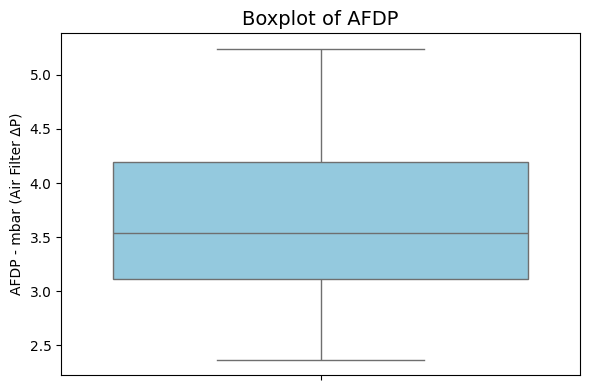

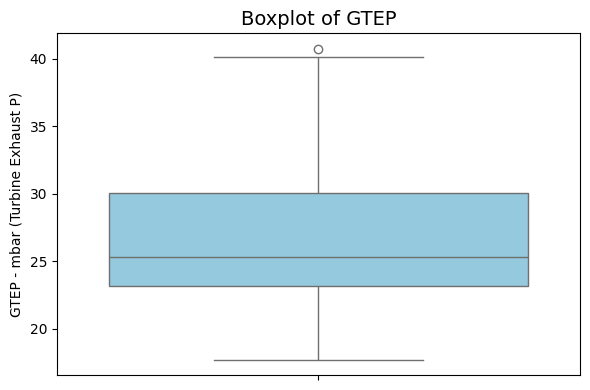

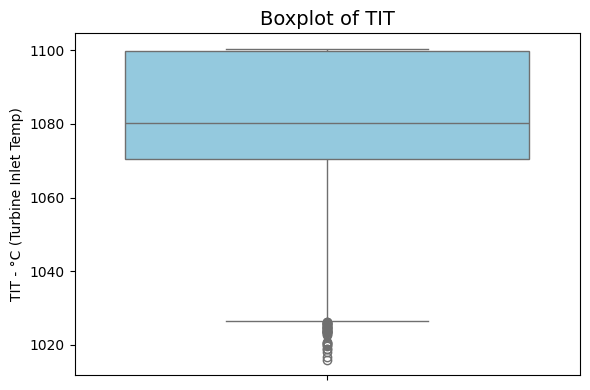

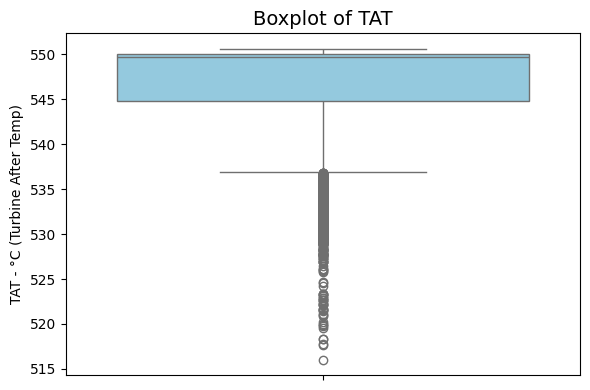

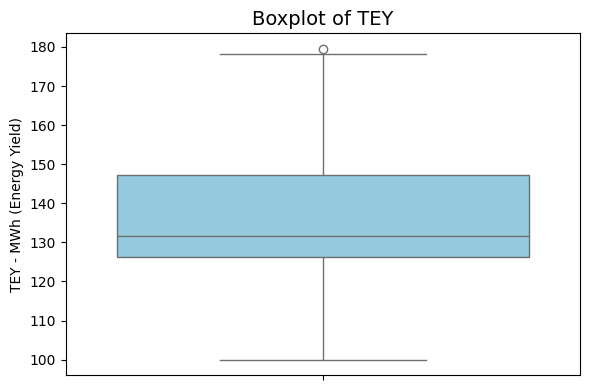

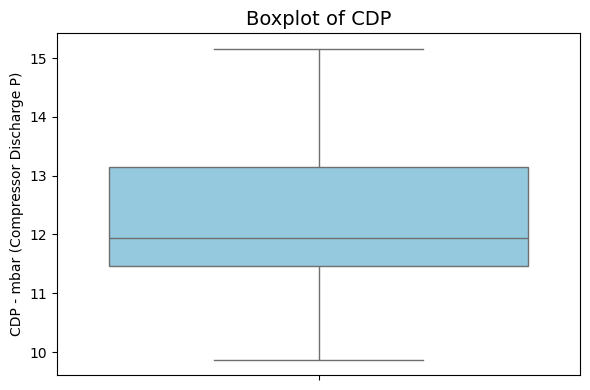

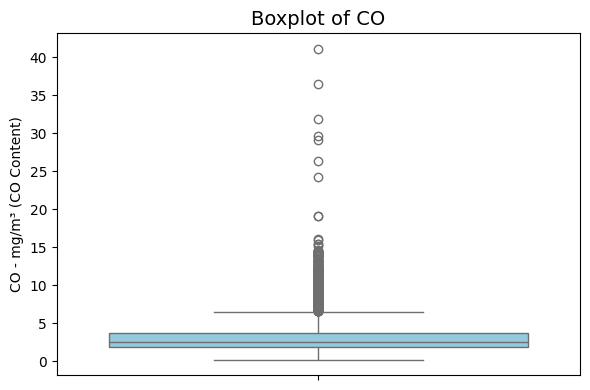

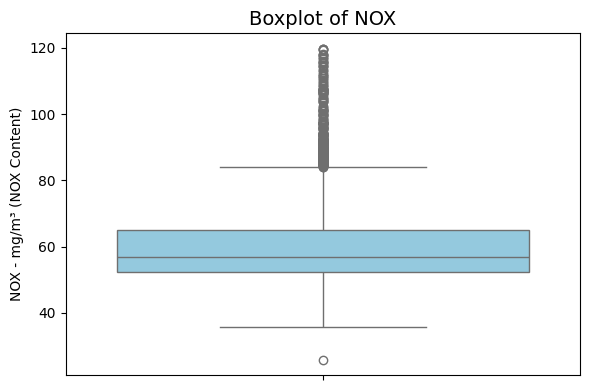

In [ ]:
# Boxplots only
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(f'{col} - {feature_units.get(col, "")}')
    plt.tight_layout()
    plt.show()




> Scatterplot of Target Variable vs Other Features



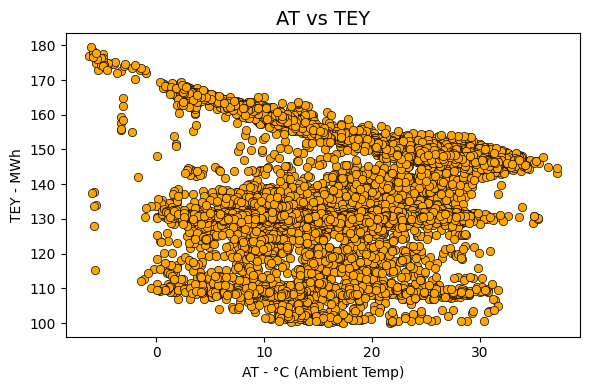

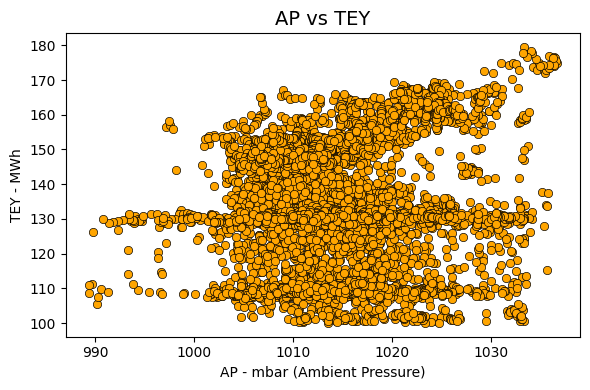

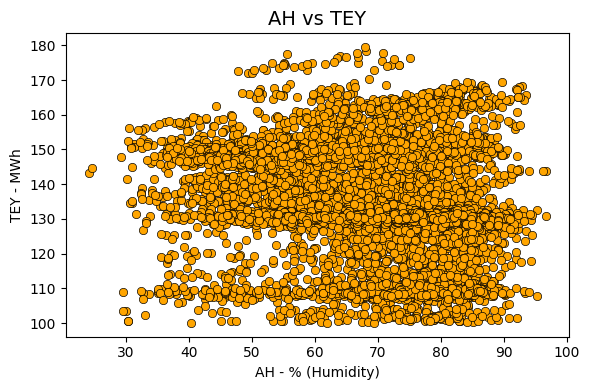

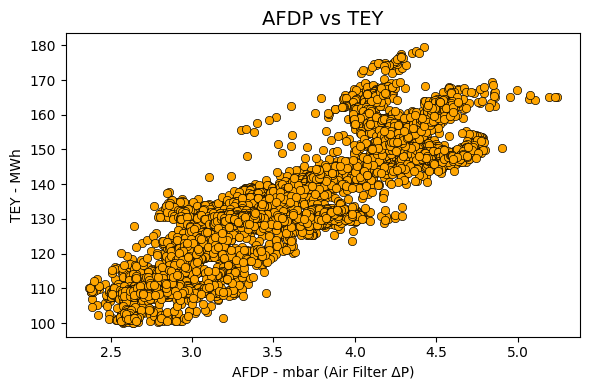

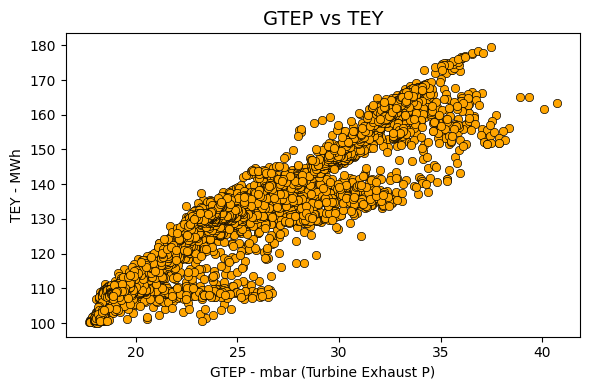

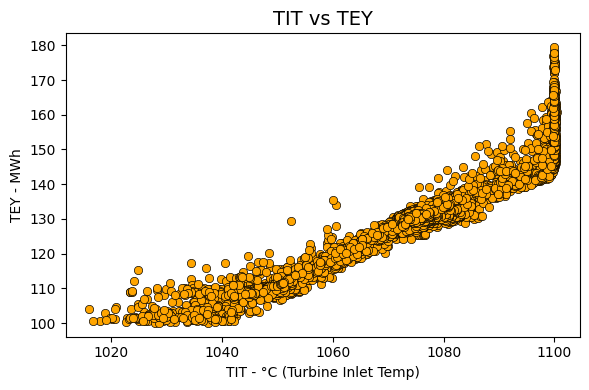

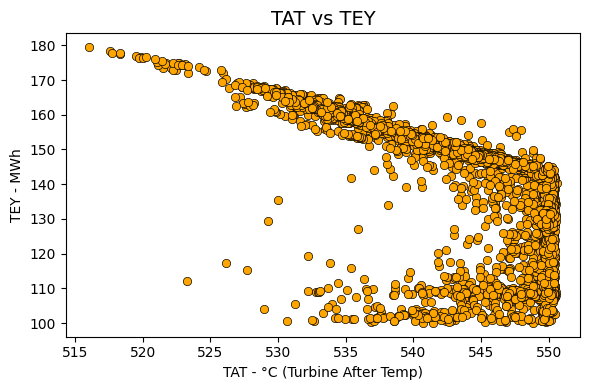

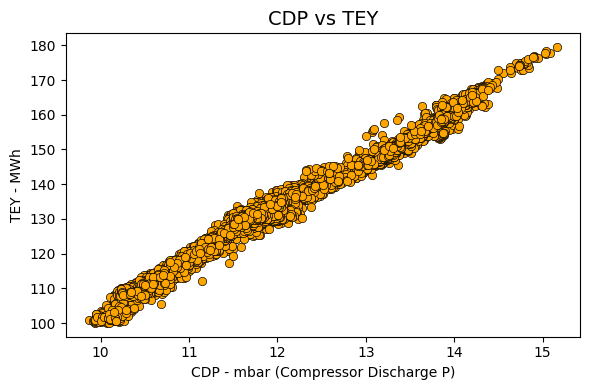

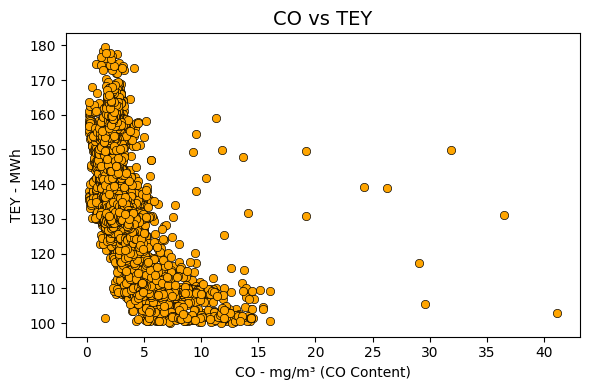

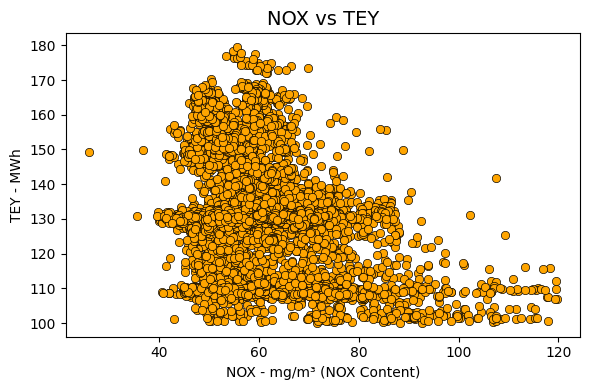

In [ ]:
for col in df.columns:
    if col != 'TEY':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['TEY'], color='orange', edgecolor='black')
        plt.title(f'{col} vs TEY', fontsize=14)
        plt.xlabel(f'{col} - {feature_units.get(col, "")}')
        plt.ylabel('TEY - MWh')
        plt.tight_layout()
        plt.show()




> Distribution of Target Variable



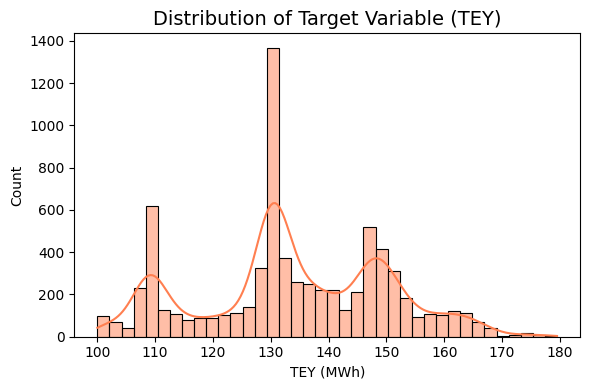

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['TEY'], kde=True, color='coral', edgecolor='black')
plt.title("Distribution of Target Variable (TEY)", fontsize=14)
plt.xlabel("TEY (MWh)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




> Skewness and Kurtosis



In [ ]:
skew_kurt = df.skew().to_frame('Skewness').join(df.kurtosis().to_frame('Kurtosis'))
print(skew_kurt)


      Skewness   Kurtosis
AT   -0.118255  -0.680877
AP    0.392052   0.550273
AH   -0.542198  -0.467848
AFDP  0.017480  -1.159660
GTEP  0.107630  -0.840612
TIT  -0.703530  -0.442686
TAT  -1.915283   3.438691
TEY  -0.054349  -0.598722
CDP   0.058759  -0.867770
CO    3.947098  34.323788
NOX   1.618716   3.841963


## Drop some features and define Target Variable and Training Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['TEY','AT','AP','AH','TIT','CDP'], axis=1)  # #Dropped AT,AP and AH as their corelation with TEY is <0.2 and dropped TIT and CDP as they have high correlation with multiple other feature

y = df['TEY']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Test target set shape:", y_test.shape)

Training samples: 5907
Testing samples: 1477
Training feature set shape: (5907, 5)
Test feature set shape: (1477, 5)
Training target set shape: (5907,)
Test target set shape: (1477,)


## 3. Implement Linear Regression Model by Normal Equation from Scratch

In [ ]:
import time
from tqdm import tqdm  # Add this line

# # Prepare data
# X = df.drop('TEY', axis=1)
# y = df['TEY'].values.reshape(-1, 1)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X = df.drop(['TEY','AT','AP','AH','TIT','CDP'], axis=1)  # #Dropped AT,AP and AH as their corelation with TEY is <0.2 and dropped TIT and CDP as they have high correlation with multiple other feature

y = df['TEY']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Manual train-test split
split_idx = int(len(X_b) * 0.8)
X_train_b, X_test_b = X_b[:split_idx], X_b[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# ⏱️ Start timing
start_time = time.time()

# 🟩 Simulate tqdm progress for model training
for _ in tqdm(range(1), desc="Training Linear Regression (Normal Eqn)"):
    theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# ⏱️ End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"✅ Training completed in {elapsed_time:.4f} seconds")


# Linear Regression via Normal Equation
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Predictions
y_train_pred = X_train_b.dot(theta_best)
y_test_pred = X_test_b.dot(theta_best)

# Define metric function
def regression_metrics(y_true, y_pred, label=''):
    print(f"\n📊 {label} Metrics:")
    print(f"RMSE:  {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")
    print(f"MAE:   {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"R²:    {r2_score(y_true, y_pred):.3f}")
    print(f"MedAE: {median_absolute_error(y_true, y_pred):.3f}")
    try:
        print(f"MSLE:  {mean_squared_log_error(y_true, y_pred):.3f}")
    except:
        print("MSLE:  Cannot compute (negative predictions present)")

# Evaluate both sets
regression_metrics(y_train, y_train_pred, "Training Set")
regression_metrics(y_test, y_test_pred, "Test Set")


# Print Actual and Predicted Values
print("Actual values are: ", y_test.values)
print("Predicted values are: ", y_test_pred)


Training Linear Regression (Normal Eqn): 100%|██████████| 1/1 [00:00<00:00, 461.42it/s]

✅ Training completed in 0.0057 seconds

📊 Training Set Metrics:
RMSE:  4.422
MAE:   3.233
R²:    0.923
MedAE: 2.462
MSLE:  0.001

📊 Test Set Metrics:
RMSE:  4.773
MAE:   4.074
R²:    0.920
MedAE: 4.046
MSLE:  0.001
Actual values are:  [130.43 130.11 129.74 ... 107.81 131.41 125.41]
Predicted values are:  [126.34074465 126.04853328 124.0755042  ... 115.42928722 131.46214219
 126.1614556 ]


In [ ]:
theta_best

array([133.39437204,   5.6587906 ,   7.58565194,  -2.95832961,
        -3.27193691,   2.28591442])

## Regression Plot: Actual vs Predicted Target Variable

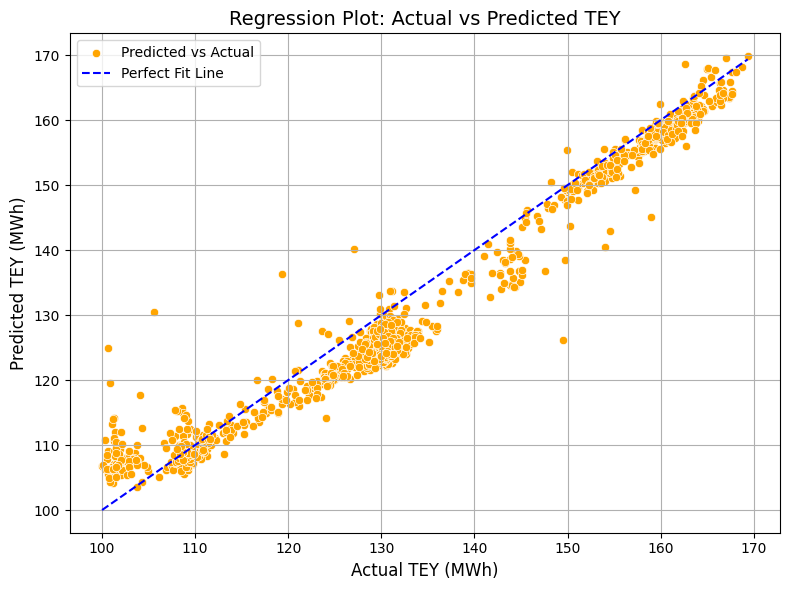

In [ ]:
# Predicted vs Actual for Test Set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values, y=y_test_pred.flatten(), color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', label='Perfect Fit Line')
plt.xlabel('Actual TEY (MWh)', fontsize=12)
plt.ylabel('Predicted TEY (MWh)', fontsize=12)
plt.title('Regression Plot: Actual vs Predicted TEY', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Residuals Plot

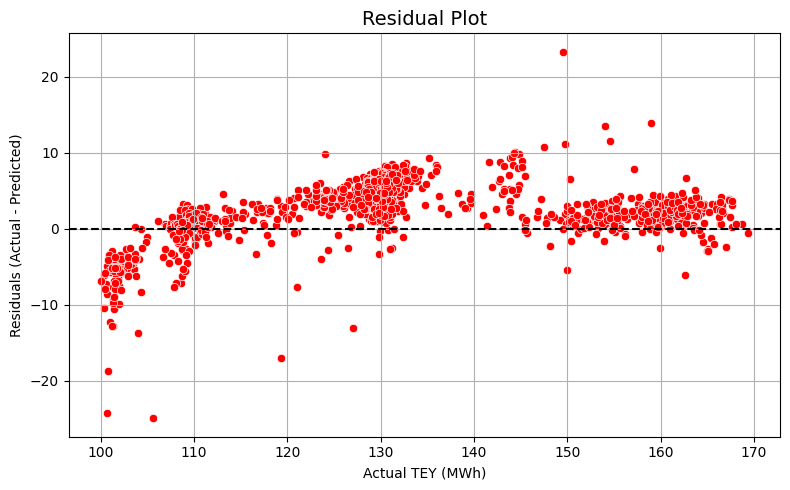

In [ ]:
residuals = y_test.values - y_test_pred.flatten()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values, y=residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot", fontsize=14)
plt.xlabel("Actual TEY (MWh)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


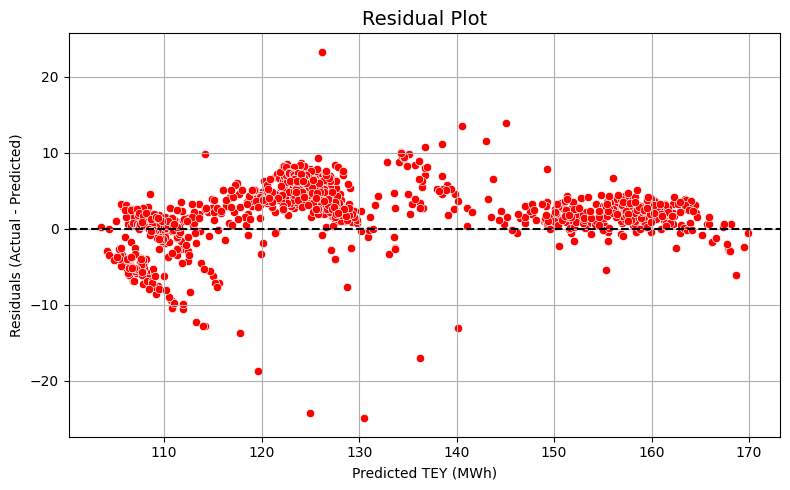

In [ ]:
residuals = y_test.values - y_test_pred.flatten()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot", fontsize=14)
plt.xlabel("Predicted TEY (MWh)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()

plt.show()


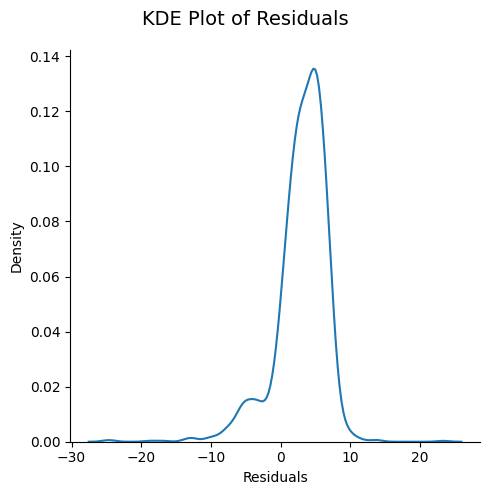

In [ ]:
g = sns.displot(residuals,kind='kde')
g.set_axis_labels("Residuals", "Density")
g.fig.suptitle("KDE Plot of Residuals", fontsize=14)

# Adjust the layout to prevent title overlap
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

plt.show()

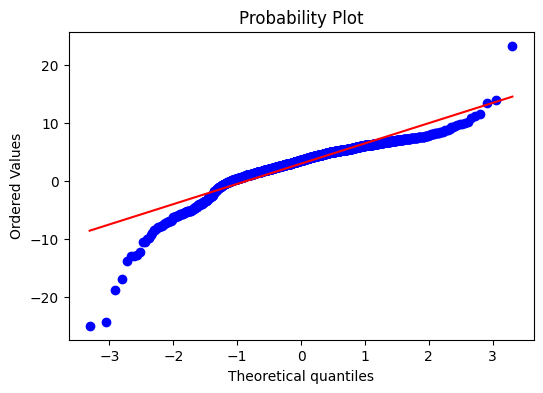

In [ ]:
# QQ Plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residuals, plot=ax, fit=True)

plt.show()

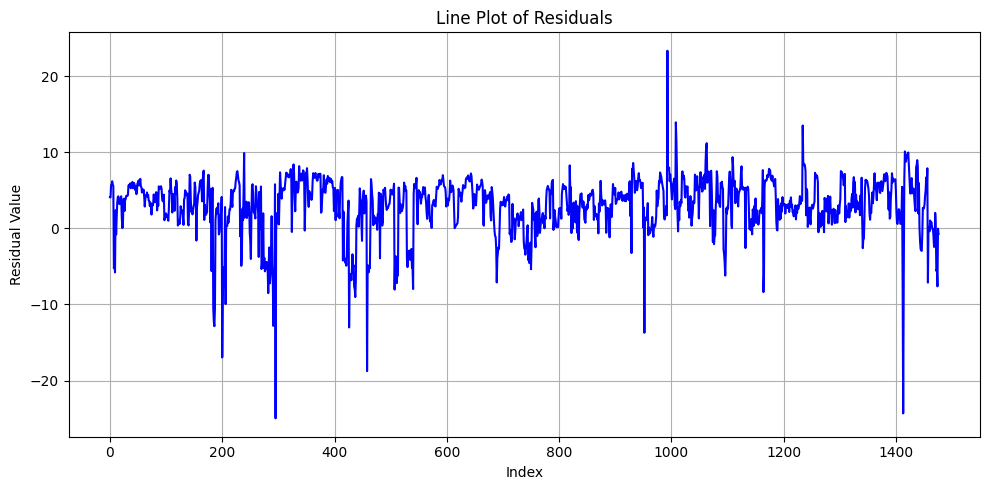

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(residuals, color='blue')  # Line plot of residuals

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Residual Value")
plt.title("Line Plot of Residuals")

plt.grid(True)
plt.tight_layout()  # Optional: adjusts layout to prevent clipping
plt.show()

## Barplot of Regression Metrices

In [ ]:
# Compute metrics manually
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Now you can plot!
train_metrics = [train_rmse, train_mae, train_r2]
test_metrics = [test_rmse, test_mae, test_r2]


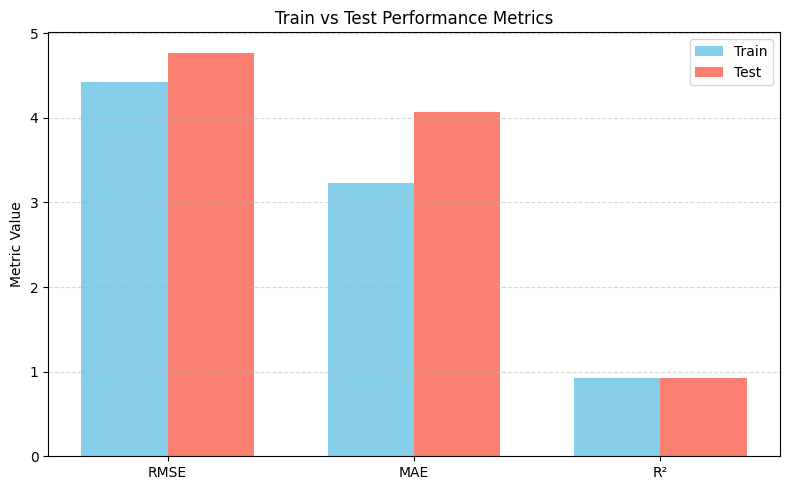

In [ ]:
metrics = ['RMSE', 'MAE', 'R²']
x = np.arange(len(metrics))

plt.figure(figsize=(8, 5))
bar_width = 0.35

plt.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='skyblue')
plt.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='salmon')

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Train vs Test Performance Metrics')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Scatterplot of Actual vs Predicted TEY of Train and Test sets

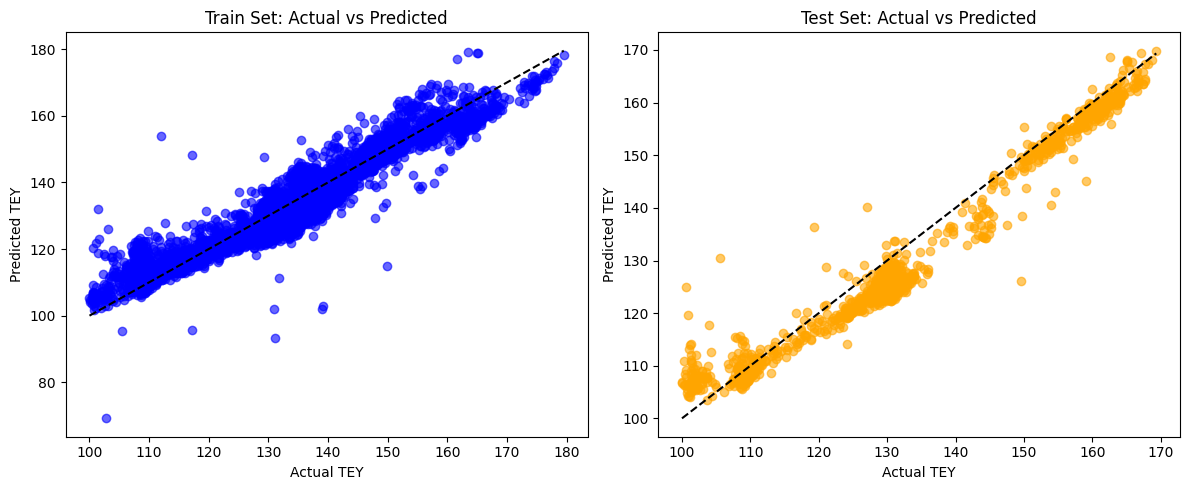

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train
axes[0].scatter(y_train, y_train_pred, color='blue', alpha=0.6)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axes[0].set_title('Train Set: Actual vs Predicted')
axes[0].set_xlabel('Actual TEY')
axes[0].set_ylabel('Predicted TEY')

# Test
axes[1].scatter(y_test, y_test_pred, color='orange', alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].set_xlabel('Actual TEY')
axes[1].set_ylabel('Predicted TEY')

plt.tight_layout()
plt.show()


## Scatterplot of Train and Test Residuals

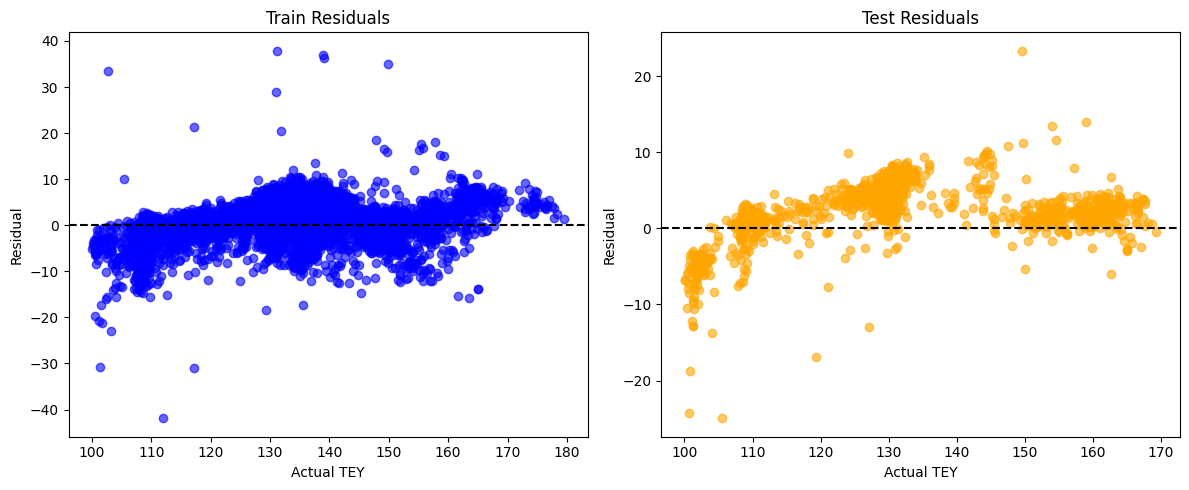

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Residuals
axes[0].scatter(y_train, y_train - y_train_pred, color='blue', alpha=0.6)
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title('Train Residuals')
axes[0].set_xlabel('Actual TEY')
axes[0].set_ylabel('Residual')

# Test Residuals
axes[1].scatter(y_test, y_test - y_test_pred.flatten(), color='orange', alpha=0.6)
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title('Test Residuals')
axes[1].set_xlabel('Actual TEY')
axes[1].set_ylabel('Residual')

plt.tight_layout()
plt.show()


## Split Dataset in Train, Test and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Initial train-test split (80% train+val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now split X_temp into train and validation (60% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (4430, 5)
Validation shape: (1477, 5)
Test shape: (1477, 5)


## 4. Polynomial Regression
Instruction: Implement polynomial regression for degrees 2, 3, and 4.



> Find Best Parameters of Polynomial Regression using GridSearchCV



In [ ]:
# Define pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

# Define parameter grid
param_grid = {
    'poly__degree': [2, 3, 4],
    'model__fit_intercept': [True, False]
}

# ⏱️ Start timing
start_time = time.time()

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# ⏱️ End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Results
print("\n✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validated R²:", grid_search.best_score_)
print(f"⏱️ Grid Search completed in {elapsed_time:.4f} seconds")


Fitting 5 folds for each of 6 candidates, totalling 30 fits

✅ Best Parameters: {'model__fit_intercept': True, 'poly__degree': 2}
✅ Best Cross-Validated R²: 0.9640027185492247
⏱️ Grid Search completed in 0.6252 seconds




> Save Model


In [ ]:
# Save the best model from grid search
best_model = grid_search.best_estimator_




> Accuracy



In [ ]:
# 📌 Evaluation function
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {label} Set:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

# 📈 Predictions using the best model
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# 🔍 Evaluate each set
evaluate(y_train, y_train_pred, "Training")
evaluate(y_val, y_val_pred, "Validation")
evaluate(y_test, y_test_pred, "Test")



📌 Training Set:
  R²:   0.9739
  RMSE: 2.6006

📌 Validation Set:
  R²:   0.9660
  RMSE: 2.9766

📌 Test Set:
  R²:   0.9736
  RMSE: 2.6742


## 5. Gradient Descent Methods Implementation On Polynomial Regression of Degree 2
Instruction: Implement batch, stochastic, and mini-batch gradient descent for Polynomial regression.

In [ ]:
# Polynomial expansion (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Add bias term manually
X_b = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]

# Train-Test split (80-20)
split = int(len(X_b) * 0.8)
X_train, X_test = X_b[:split], X_b[split:]
y_train, y_test = y[:split], y[split:]



> Batch Gradient Descent



In [ ]:
def batch_gradient_descent(X, y, alpha=0.01, n_iters=1000, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for iteration in range(n_iters):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients

        # Cost (MSE)
        cost = np.mean((X.dot(theta) - y)**2)
        cost_history.append(cost)

        # Convergence check
        if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"✅ Converged at iteration {iteration}")
            break

    return theta, cost_history


In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# ⏱️ Start timing
start_time = time.time()

# Train using Batch Gradient Descent
theta_bgd, cost_history = batch_gradient_descent(X_train, y_train, alpha=0.01, n_iters=10000)

# ⏱️ End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\n⏱️ Batch Gradient Descent completed in {elapsed_time:.4f} seconds")

# Predictions
y_train_pred = X_train.dot(theta_bgd)
y_test_pred = X_test.dot(theta_bgd)



⏱️ Batch Gradient Descent completed in 2.2686 seconds


In [ ]:
# 📌 Evaluation function
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {label} Set:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

# 🔍 Evaluate BGD results
evaluate(y_train, y_train_pred, "Training (BGD)")
evaluate(y_test, y_test_pred, "Test (BGD)")



📌 Training (BGD) Set:
  R²:   0.9719
  RMSE: 2.6772

📌 Test (BGD) Set:
  R²:   0.9682
  RMSE: 3.0016


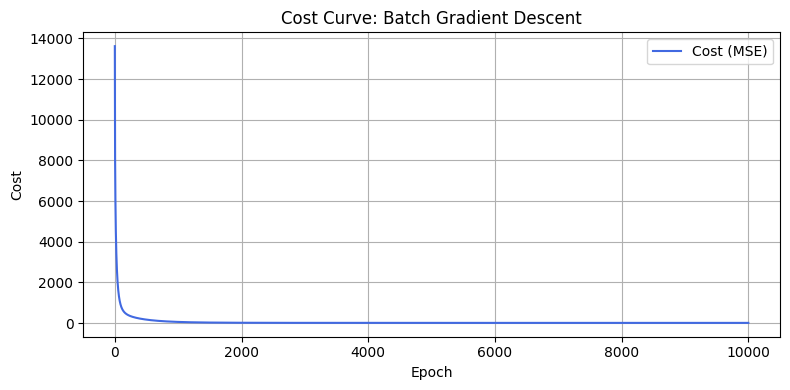

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(cost_history, label='Cost (MSE)', color='royalblue')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Curve: Batch Gradient Descent")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Mini Batch Gradient Descent



In [ ]:
def mini_batch_gradient_descent(X, y, alpha=0.01, n_iters=1000, batch_size=32, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for iteration in range(n_iters):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = (2 / len(X_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta = theta - alpha * gradients

        # Track cost after each full epoch
        cost = np.mean((X.dot(theta) - y)**2)
        cost_history.append(cost)

        # Convergence check
        if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"✅ Converged at iteration {iteration}")
            break

    return theta, cost_history


In [ ]:
# ⏱️ Start timing
start_time = time.time()

# Run Mini-Batch GD
theta_mbgd, mbgd_cost = mini_batch_gradient_descent(X_train, y_train, alpha=0.001, n_iters=1000, batch_size=128)

# ⏱️ End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\n⏱️ Mini-Batch Gradient Descent completed in {elapsed_time:.4f} seconds")

# Predictions
y_train_pred_mbgd = X_train.dot(theta_mbgd)
y_test_pred_mbgd = X_test.dot(theta_mbgd)



⏱️ Mini-Batch Gradient Descent completed in 0.9020 seconds


In [ ]:
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {label} Set:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

evaluate(y_train, y_train_pred_mbgd, "Training (MBGD)")
evaluate(y_test, y_test_pred_mbgd, "Test (MBGD)")



📌 Training (MBGD) Set:
  R²:   0.9707
  RMSE: 2.7327

📌 Test (MBGD) Set:
  R²:   0.9721
  RMSE: 2.8131


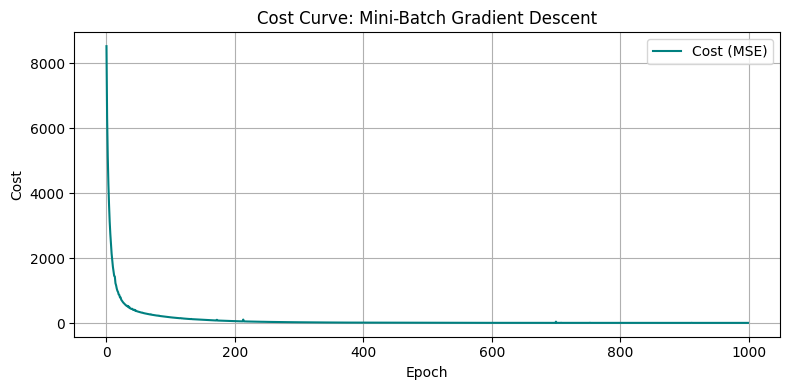

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(mbgd_cost, label='Cost (MSE)', color='teal')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Curve: Mini-Batch Gradient Descent")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Stochastic Gradient Descent



In [ ]:
def stochastic_gradient_descent(X, y, alpha=0.01, n_epochs=50, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for epoch in range(n_epochs):
        total_cost = 0
        indices = np.random.permutation(m)  # shuffle
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - alpha * gradients

            # accumulate cost
            cost = np.mean((xi.dot(theta) - yi)**2)
            total_cost += cost

        # average cost for the epoch
        epoch_cost = total_cost / m
        cost_history.append(epoch_cost)

        # early stopping
        if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"✅ Converged at epoch {epoch}")
            break

    return theta, cost_history


In [ ]:
# ⏱️ Start timing
start_time = time.time()

# Run SGD
theta_sgd, sgd_cost = stochastic_gradient_descent(X_train, y_train, alpha=0.00001, n_epochs=1000)

# ⏱️ End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\n⏱️ Stochastic Gradient Descent completed in {elapsed_time:.4f} seconds")

# Predictions
y_train_pred_sgd = X_train.dot(theta_sgd)
y_test_pred_sgd = X_test.dot(theta_sgd)



⏱️ Stochastic Gradient Descent completed in 112.8608 seconds


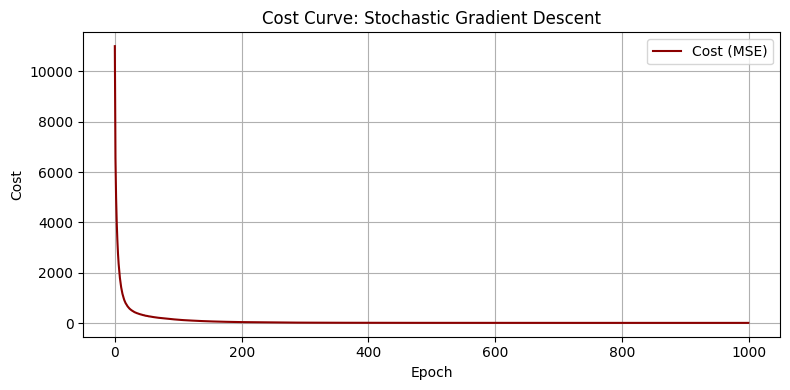

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sgd_cost, label='Cost (MSE)', color='darkred')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Curve: Stochastic Gradient Descent")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def evaluate(y_true, y_pred, label):
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {label} Set:")
    print(f"  R²:   {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

evaluate(y_train, y_train_pred_sgd, "Training (SGD)")
evaluate(y_test, y_test_pred_sgd, "Test (SGD)")



📌 Training (SGD) Set:
  R²:   0.9710
  RMSE: 2.7199

📌 Test (SGD) Set:
  R²:   0.9690
  RMSE: 2.9634


## Actual vs Prediction Plots in Train and Test Sets by Gradient Descent Methods



> Batch GD



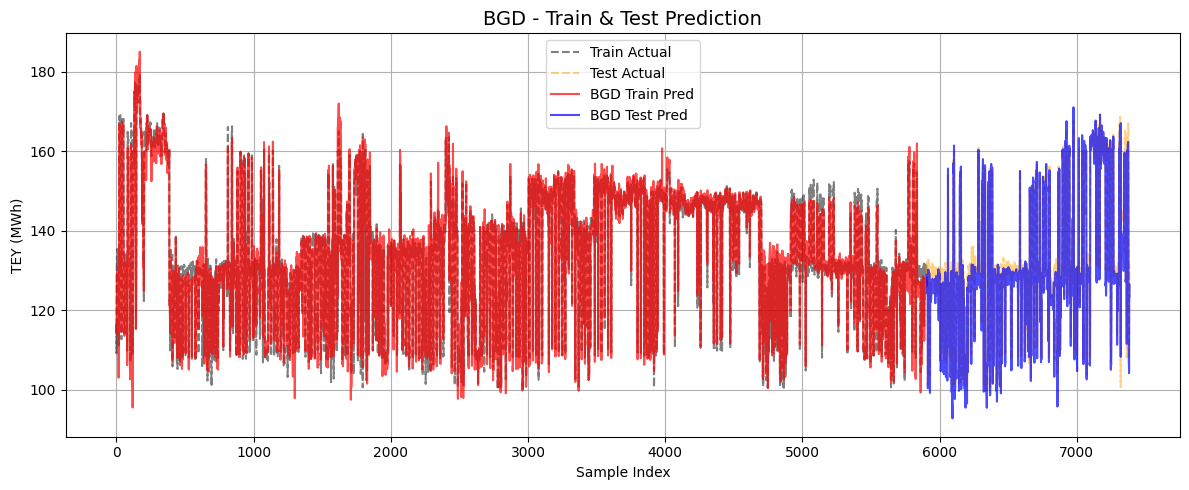

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Actual
plt.plot(y_train, label='Train Actual', linestyle='--', color='black', alpha=0.5)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Actual', linestyle='--', color='orange', alpha=0.5)

# Plot BGD Predictions
plt.plot(y_train_pred, label='BGD Train Pred', color='red', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, label='BGD Test Pred', color='blue', alpha=0.7)

plt.title("BGD - Train & Test Prediction", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("TEY (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




> Mini Batch GD



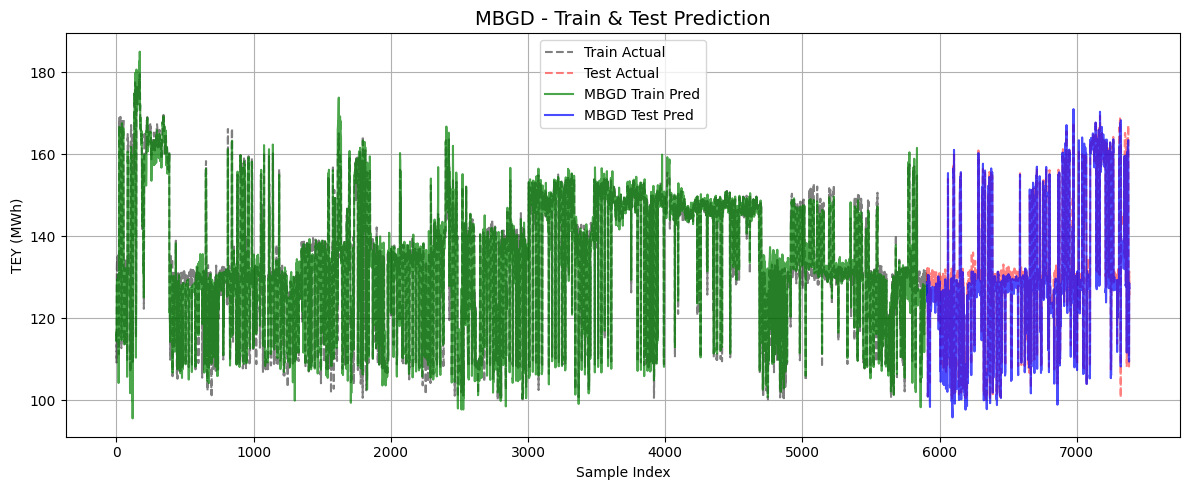

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Actual
plt.plot(y_train, label='Train Actual', linestyle='--', color='black', alpha=0.5)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Actual', linestyle='--', color='red', alpha=0.5)

# Plot MBGD Predictions
plt.plot(y_train_pred_mbgd, label='MBGD Train Pred', color='green', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred_mbgd, label='MBGD Test Pred', color='blue', alpha=0.7)

plt.title("MBGD - Train & Test Prediction", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("TEY (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




> Stochastic GD



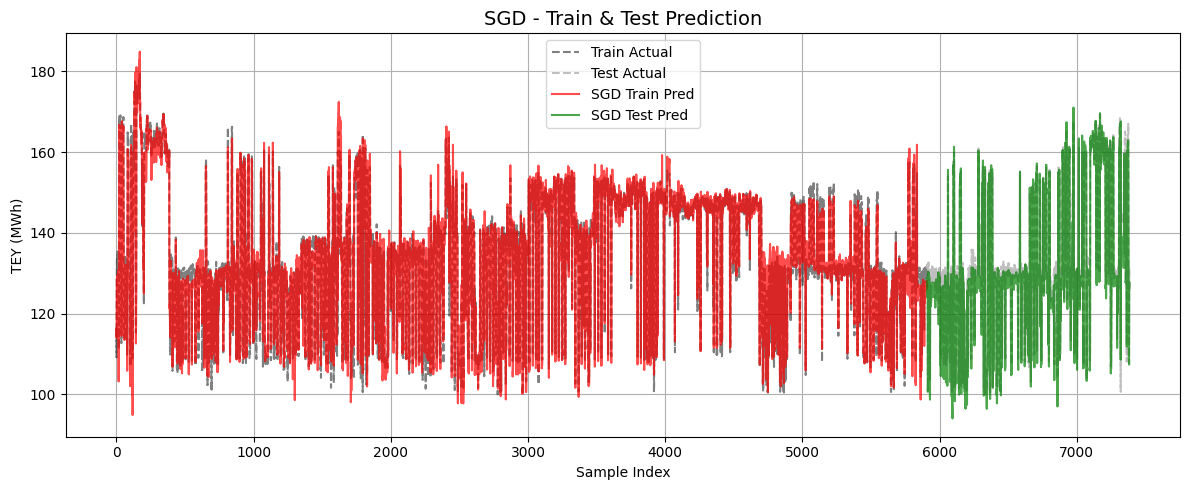

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Actual
plt.plot(y_train, label='Train Actual', linestyle='--', color='black', alpha=0.5)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Actual', linestyle='--', color='gray', alpha=0.5)

# Plot SGD Predictions
plt.plot(y_train_pred_sgd, label='SGD Train Pred', color='red', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred_sgd, label='SGD Test Pred', color='green', alpha=0.7)

plt.title("SGD - Train & Test Prediction", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("TEY (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Gradient Descent Methods Implementation On Linear Regression
Instruction: Implement batch, stochastic, and mini-batch gradient descent for Linear Regression.

In [ ]:
# Drop target and irrelevant/dropped features
X = df.drop(['TEY', 'AT', 'AP', 'AH', 'TIT', 'CDP'], axis=1)
y = df['TEY'].values.reshape(-1, 1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Manual train-test split
split_idx = int(len(X_b) * 0.8)
X_train, X_test = X_b[:split_idx], X_b[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]




> Batch GD



✅ Converged at iteration 1843

⏱️ BGD completed in 0.7444 seconds

📌 Training Set (BGD):
  R²:   0.9234
  RMSE: 4.4218

📌 Test Set (BGD):
  R²:   0.9196
  RMSE: 4.7711


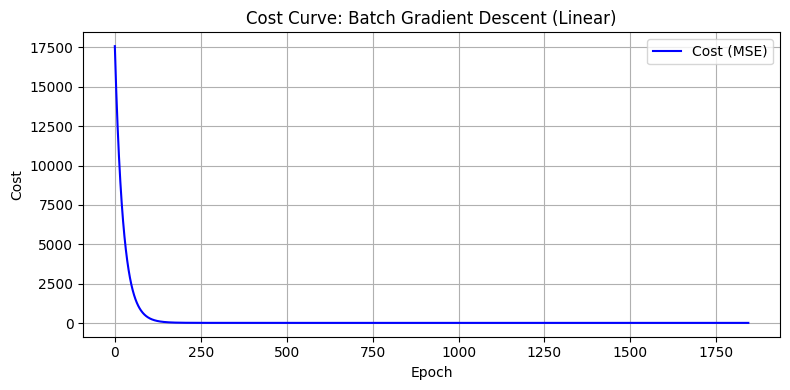

In [ ]:
# --- Function Definition ---
def batch_gradient_descent(X, y, alpha=0.01, n_iters=10000, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for iteration in range(n_iters):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients

        # Cost (MSE)
        cost = np.mean((X.dot(theta) - y)**2)
        cost_history.append(cost)

        # Convergence check
        if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"✅ Converged at iteration {iteration}")
            break

    return theta, cost_history

# --- Reshape target if needed ---
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- Run BGD ---
start_time = time.time()
theta_bgd, bgd_cost = batch_gradient_descent(X_train, y_train, alpha=0.01, n_iters=2000)
end_time = time.time()
print(f"\n⏱️ BGD completed in {end_time - start_time:.4f} seconds")

# --- Predictions ---
y_train_pred_bgd = X_train.dot(theta_bgd)
y_test_pred_bgd = X_test.dot(theta_bgd)

# --- Evaluation ---
def evaluate_bgd(y_true, y_pred, label=""):
    print(f"\n📌 {label} Set (BGD):")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

evaluate_bgd(y_train, y_train_pred_bgd, "Training")
evaluate_bgd(y_test, y_test_pred_bgd, "Test")

# --- Plot Cost Curve ---
plt.figure(figsize=(8, 4))
plt.plot(bgd_cost, label='Cost (MSE)', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Curve: Batch Gradient Descent (Linear)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Actual vs Prediction Plots in Train and Test Sets by BGD



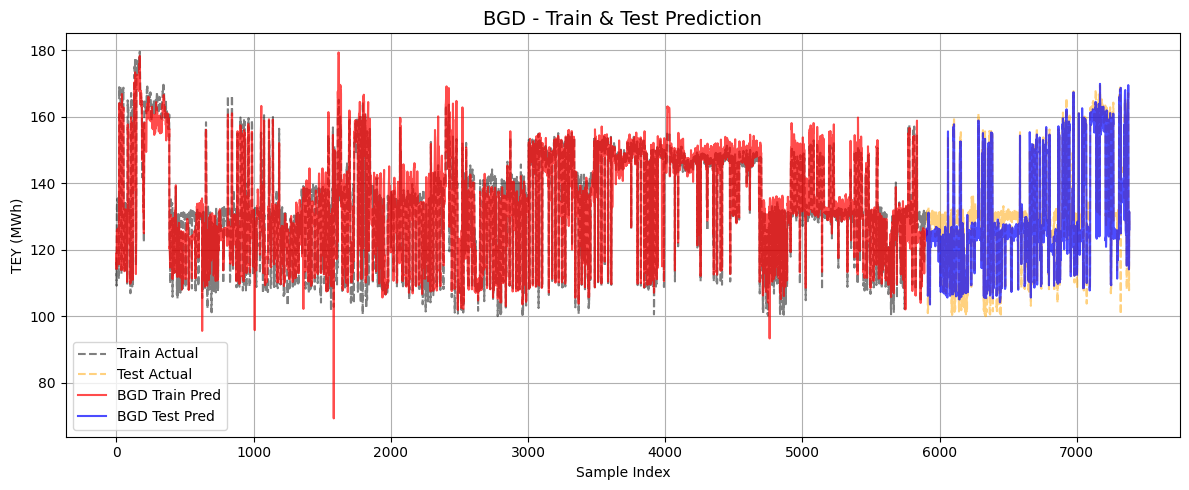

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Actual
plt.plot(y_train, label='Train Actual', linestyle='--', color='black', alpha=0.5)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Actual', linestyle='--', color='orange', alpha=0.5)

# Plot BGD Predictions
plt.plot(y_train_pred_bgd, label='BGD Train Pred', color='red', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred_bgd, label='BGD Test Pred', color='blue', alpha=0.7)

plt.title("BGD - Train & Test Prediction", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("TEY (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Mini Batch GD



✅ Converged at iteration 186

⏱️ Mini-Batch Gradient Descent completed in 0.1989 seconds

📌 Training Set (MBGD):
  R²:   0.9234
  RMSE: 4.4218

📌 Test Set (MBGD):
  R²:   0.9196
  RMSE: 4.7716


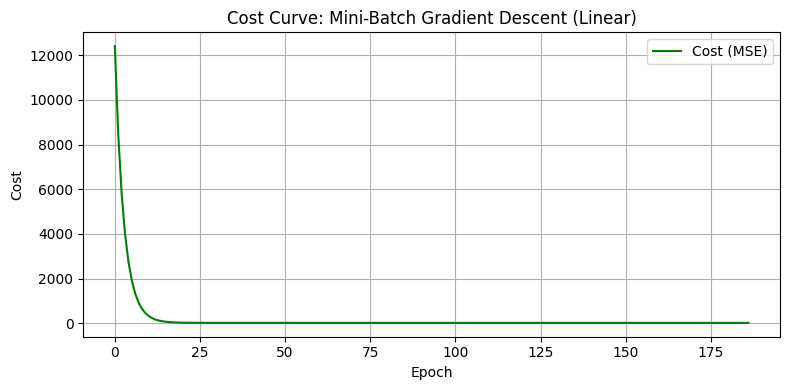

In [ ]:
# --- Function Definition ---
def mini_batch_gradient_descent(X, y, alpha=0.01, n_iters=1000, batch_size=64, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for iteration in range(n_iters):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = (2 / len(X_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta = theta - alpha * gradients

        # Track cost after each epoch
        cost = np.mean((X.dot(theta) - y)**2)
        cost_history.append(cost)

        if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"✅ Converged at iteration {iteration}")
            break

    return theta, cost_history

# --- Reshape target if needed ---
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- Run MBGD ---
start_time = time.time()
theta_mbgd, mbgd_cost = mini_batch_gradient_descent(X_train, y_train, alpha=0.001, n_iters=1000, batch_size=64)
end_time = time.time()
print(f"\n⏱️ Mini-Batch Gradient Descent completed in {end_time - start_time:.4f} seconds")

# --- Predictions ---
y_train_pred_mbgd = X_train.dot(theta_mbgd)
y_test_pred_mbgd = X_test.dot(theta_mbgd)

# --- Evaluation ---
def evaluate_mbgd(y_true, y_pred, label=""):
    print(f"\n📌 {label} Set (MBGD):")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

evaluate_mbgd(y_train, y_train_pred_mbgd, "Training")
evaluate_mbgd(y_test, y_test_pred_mbgd, "Test")

# --- Plot Cost Curve ---
plt.figure(figsize=(8, 4))
plt.plot(mbgd_cost, label='Cost (MSE)', color='green')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Curve: Mini-Batch Gradient Descent (Linear)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Actual vs Prediction Plots in Train and Test Sets by Mini Batch GD



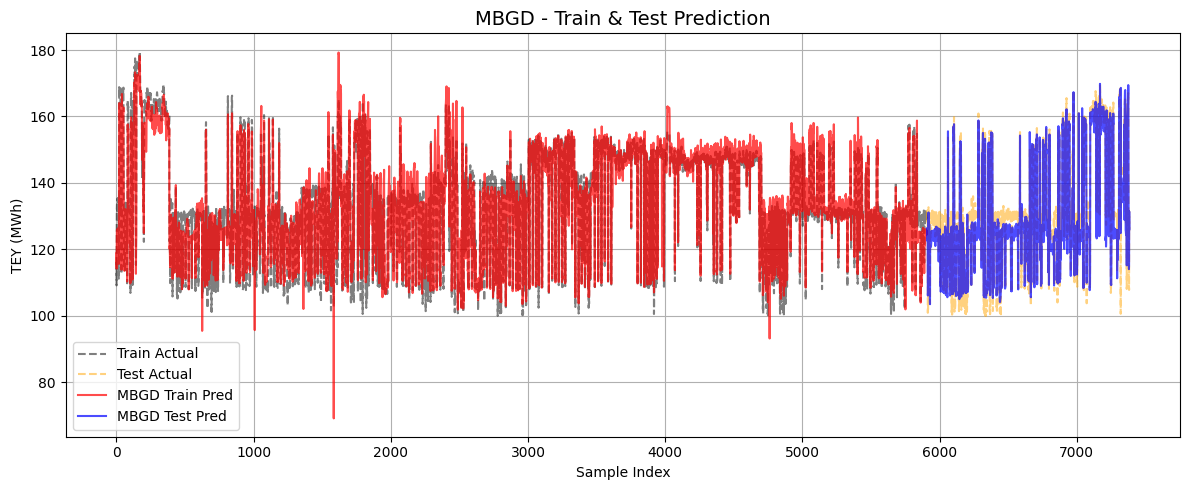

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Actual
plt.plot(y_train, label='Train Actual', linestyle='--', color='black', alpha=0.5)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Actual', linestyle='--', color='orange', alpha=0.5)

# Plot BGD Predictions
plt.plot(y_train_pred_mbgd, label='MBGD Train Pred', color='red', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred_mbgd, label='MBGD Test Pred', color='blue', alpha=0.7)

plt.title("MBGD - Train & Test Prediction", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("TEY (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Stochastic GD



✅ Converged at epoch 320

⏱️ Stochastic Gradient Descent completed in 35.4451 seconds

📌 Training Set (SGD):
  R²:   0.9234
  RMSE: 4.4218

📌 Test Set (SGD):
  R²:   0.9196
  RMSE: 4.7733


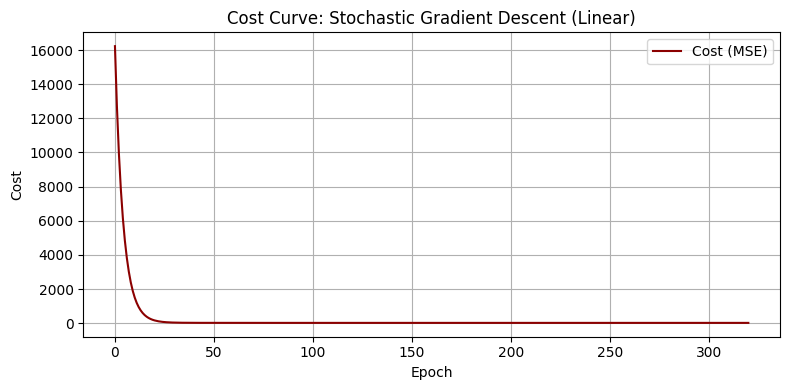

In [ ]:
# --- Function Definition ---
def stochastic_gradient_descent(X, y, alpha=0.00001, n_epochs=1000, tol=1e-6):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for epoch in range(n_epochs):
        total_cost = 0
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - alpha * gradients

            cost = np.mean((xi.dot(theta) - yi) ** 2)
            total_cost += cost

        epoch_cost = total_cost / m
        cost_history.append(epoch_cost)

        if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"✅ Converged at epoch {epoch}")
            break

    return theta, cost_history

# --- Ensure y shape ---
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- Run SGD ---
start_time = time.time()
theta_sgd, sgd_cost = stochastic_gradient_descent(X_train, y_train, alpha=0.00001, n_epochs=1000)
end_time = time.time()
print(f"\n⏱️ Stochastic Gradient Descent completed in {end_time - start_time:.4f} seconds")

# --- Predictions ---
y_train_pred_sgd = X_train.dot(theta_sgd)
y_test_pred_sgd = X_test.dot(theta_sgd)

# --- Evaluation ---
def evaluate_sgd(y_true, y_pred, label=""):
    print(f"\n📌 {label} Set (SGD):")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

evaluate_sgd(y_train, y_train_pred_sgd, "Training")
evaluate_sgd(y_test, y_test_pred_sgd, "Test")

# --- Plot Cost Curve ---
plt.figure(figsize=(8, 4))
plt.plot(sgd_cost, label='Cost (MSE)', color='darkred')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Curve: Stochastic Gradient Descent (Linear)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




> Actual vs Prediction Plots in Train and Test Sets by Stochastic GD



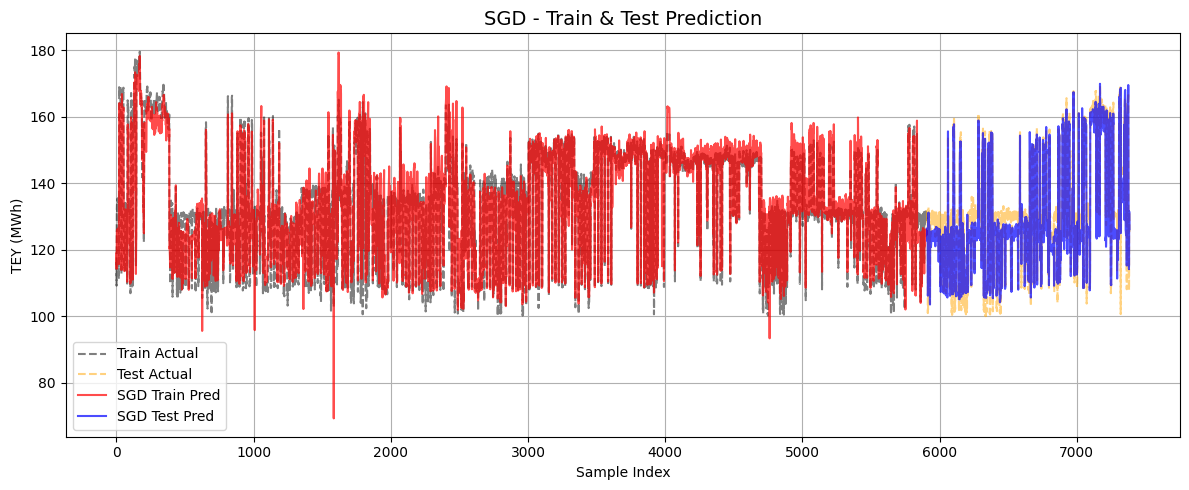

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Actual
plt.plot(y_train, label='Train Actual', linestyle='--', color='black', alpha=0.5)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test Actual', linestyle='--', color='orange', alpha=0.5)

# Plot BGD Predictions
plt.plot(y_train_pred_sgd, label='SGD Train Pred', color='red', alpha=0.7)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred_sgd, label='SGD Test Pred', color='blue', alpha=0.7)

plt.title("SGD - Train & Test Prediction", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("TEY (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)
Instruction: Implement Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn.

In [ ]:
# ✅ Recreate your consistent feature matrix
features_to_keep = ['AFDP', 'GTEP', 'TAT', 'CO', 'NOX']  # example: 5 final features

X = df[features_to_keep]
y = df['TEY']

# Split into Train, Validation, Test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## Ridge Regression

In [ ]:
# 🔁 Loop over different alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
best_alpha = None
best_model = None
best_val_score = -np.inf


# ⏱️ Timing
start_time = time.time()

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    val_score = ridge.score(X_val, y_val)

    if val_score > best_val_score:
        best_val_score = val_score
        best_alpha = alpha
        best_model = ridge

end_time = time.time()
print(f"⏱️ Ridge tuning completed in {end_time - start_time:.4f} seconds")
print(f"✅ Best alpha: {best_alpha}")
print(f"📈 Best Validation R²: {best_val_score:.4f}")


⏱️ Ridge tuning completed in 0.0228 seconds
✅ Best alpha: 0.01
📈 Best Validation R²: 0.9252


In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, label="Model"):
    print(f"\n📌 {label} Regression Evaluation:")

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse   = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"📉 Training Set:   R² = {r2_score(y_train, y_train_pred):.4f}, RMSE = {train_rmse:.4f}")
    print(f"📉 Validation Set: R² = {r2_score(y_val, y_val_pred):.4f}, RMSE = {val_rmse:.4f}")
    print(f"📉 Test Set:       R² = {r2_score(y_test, y_test_pred):.4f}, RMSE = {test_rmse:.4f}")

    return y_train_pred, y_val_pred, y_test_pred


In [ ]:
y_train_pred_ridge, y_val_pred_ridge, y_test_pred_ridge = evaluate_model(
    best_model, X_train, y_train, X_val, y_val, X_test, y_test, label="Ridge"
)



📌 Ridge Regression Evaluation:
📉 Training Set:   R² = 0.9247, RMSE = 4.4023
📉 Validation Set: R² = 0.9252, RMSE = 4.5239
📉 Test Set:       R² = 0.9280, RMSE = 4.4070


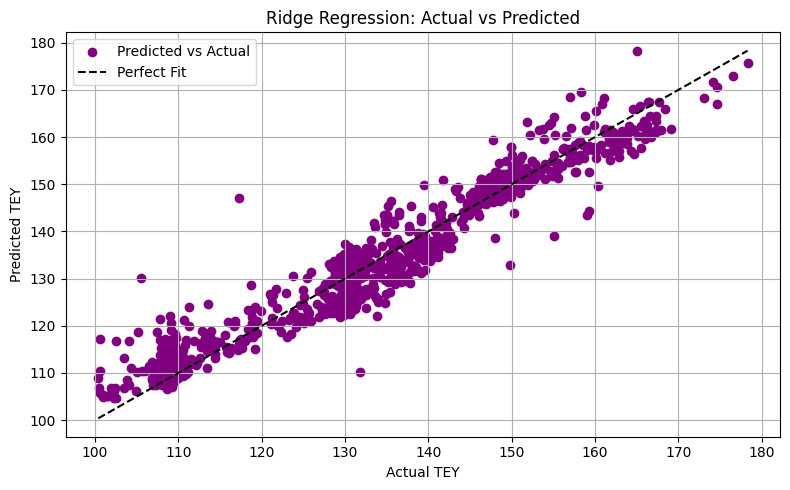

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred_ridge, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Actual TEY")
plt.ylabel("Predicted TEY")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Lasso Regression

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
best_alpha = None
best_model = None
best_score = -float('inf')


start_time = time.time()

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_train, y_train)
    val_r2 = lasso.score(X_val, y_val)

    if val_r2 > best_score:
        best_score = val_r2
        best_alpha = alpha
        best_model = lasso

end_time = time.time()
elapsed = end_time - start_time

print(f"✅ Best alpha: {best_alpha}")
print(f"✅ Best Validation R²: {best_score:.4f}")
print(f"⏱️ Tuning completed in {elapsed:.4f} seconds")


✅ Best alpha: 0.01
✅ Best Validation R²: 0.9252
⏱️ Tuning completed in 0.0253 seconds


In [ ]:
def evaluate_fixed(y_true, y_pred, label=''):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # manual RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"📉 {label}: R² = {r2:.4f}, RMSE = {rmse:.4f}")
print("\n📌 Lasso Regression Evaluation:")

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

evaluate_fixed(y_train, y_train_pred, "Training Set")
evaluate_fixed(y_val, y_val_pred, "Validation Set")
evaluate_fixed(y_test, y_test_pred, "Test Set")



📌 Lasso Regression Evaluation:
📉 Training Set: R² = 0.9247, RMSE = 4.4024
📉 Validation Set: R² = 0.9252, RMSE = 4.5229
📉 Test Set: R² = 0.9279, RMSE = 4.4081


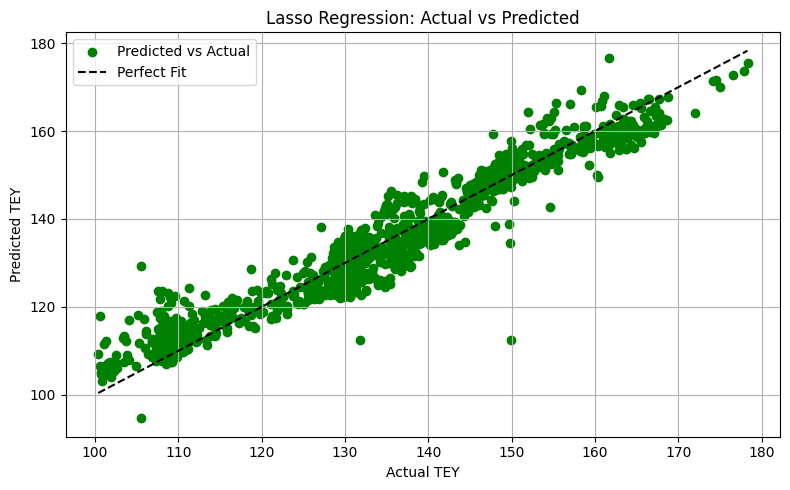

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Actual TEY")
plt.ylabel("Predicted TEY")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
alphas = [0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]

best_model = None
best_val_r2 = float('-inf')
best_alpha = None
best_l1_ratio = None

start_time = time.time()


for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        val_r2 = model.score(X_val, y_val)

        if val_r2 > best_val_r2:
            best_val_r2 = val_r2
            best_model = model
            best_alpha = alpha
            best_l1_ratio = l1_ratio

elapsed_time = time.time() - start_time
print(f"✅ Best alpha: {best_alpha}, Best l1_ratio: {best_l1_ratio}")
print(f"✅ Best Validation R²: {best_val_r2:.4f}")
print(f"⏱️ Tuning completed in {elapsed_time:.4f} seconds")


✅ Best alpha: 0.01, Best l1_ratio: 0.9
✅ Best Validation R²: 0.9252
⏱️ Tuning completed in 0.0404 seconds


In [ ]:
def evaluate_model(y_true, y_pred, label=''):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Manual RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"📉 {label}: R² = {r2:.4f}, RMSE = {rmse:.4f}")
print("\n📌 Elastic Net Regression Evaluation:")
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_val, y_val_pred, "Validation Set")
evaluate_model(y_test, y_test_pred, "Test Set")



📌 Elastic Net Regression Evaluation:
📉 Training Set: R² = 0.9247, RMSE = 4.4024
📉 Validation Set: R² = 0.9252, RMSE = 4.5233
📉 Test Set: R² = 0.9279, RMSE = 4.4079


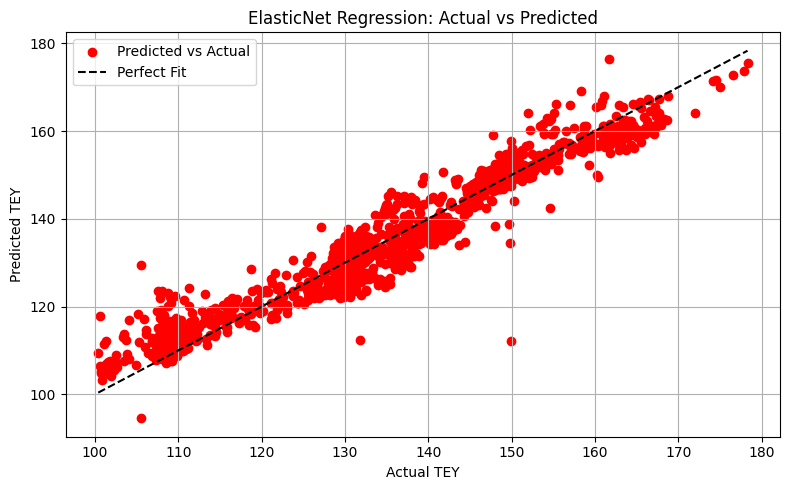

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='red', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Actual TEY")
plt.ylabel("Predicted TEY")
plt.title("ElasticNet Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Early Stopping


> Early Stopping in Ridge Regression using Scikit Learn (SGDRegressor)



In [ ]:
X = df.drop(columns=['TEY','AT','AP','AH','TIT','CDP'])
y = df['TEY']

# Step 1: Train/Validation/Test Split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# (Now: 60% train, 20% val, 20% test)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Ridge-like Regression with Early Stopping
model = SGDRegressor(
    penalty='l2',              # Ridge regression (L2)
    early_stopping=True,       # Enable early stopping
    validation_fraction=0.1,   # Internal split from train set (not used here, but needed)
    n_iter_no_change=5,        # Stop if no improvement
    max_iter=1000,
    tol=1e-4,
    random_state=42
)

# Step 4: Fit the model using only training set
model.fit(X_train_scaled, y_train)

# Step 5: Predict and Evaluate
def evaluate_model(X, y, dataset_name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"📊 {dataset_name} Metrics:")
    print(f"    MSE : {mse:.4f}")
    print(f"    R²  : {r2:.4f}")
    return mse, r2

evaluate_model(X_train_scaled, y_train, "Train")
evaluate_model(X_val_scaled, y_val, "Validation")
evaluate_model(X_test_scaled, y_test, "Test")


📊 Train Metrics:
    MSE : 19.1468
    R²  : 0.9261
📊 Validation Metrics:
    MSE : 21.2161
    R²  : 0.9185
📊 Test Metrics:
    MSE : 19.5252
    R²  : 0.9280


(19.525193411823032, 0.9279780564731713)

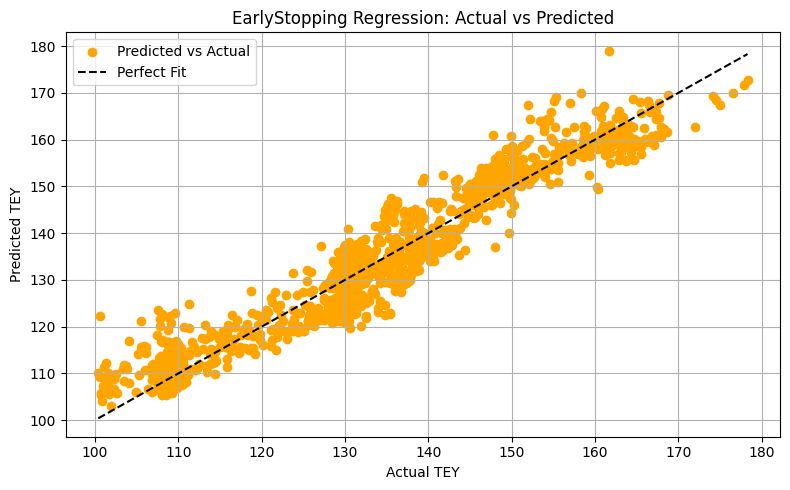

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Actual TEY")
plt.ylabel("Predicted TEY")
plt.title("EarlyStopping Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Implement linear Regression using SVD

📊 Evaluation on Train
R2 Score      : 0.9246717321939805
MAE           : 3.304364349920821
MSE           : 19.386778858976317
RMSE          : 4.4030420005919

📊 Evaluation on Validation
R2 Score      : 0.9251322980773703
MAE           : 3.381154790984993
MSE           : 20.48028906712194
RMSE          : 4.525515337187793

📊 Evaluation on Test
R2 Score      : 0.9279681497184805
MAE           : 3.3583199447265146
MSE           : 19.41725507492065
RMSE          : 4.406501455227338



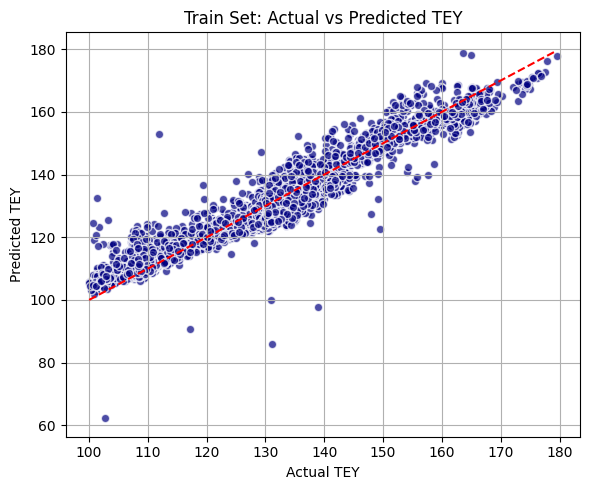

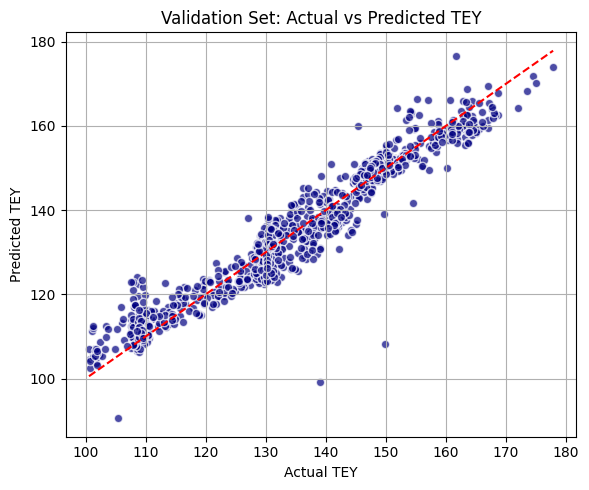

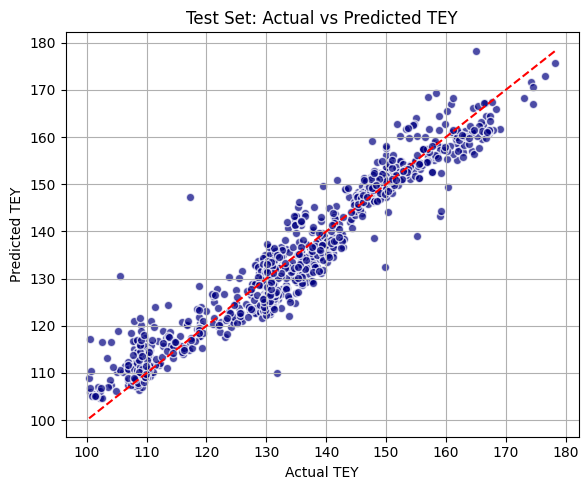

In [ ]:
# --- Step 1: Select features and target
features_to_keep = ['AFDP', 'GTEP', 'TAT', 'CO', 'NOX']
X = df[features_to_keep]
y = df['TEY']

# --- Step 2: Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Step 3: Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Truncated SVD for Dimensionality Reduction
n_components = min(X_train_scaled.shape[1], 4)  # choose <= number of features
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_val_svd = svd.transform(X_val_scaled)
X_test_svd = svd.transform(X_test_scaled)

# --- Step 5: Regression
regressor = LinearRegression()
regressor.fit(X_train_svd, y_train)

# --- Step 6: Predictions
y_train_pred = regressor.predict(X_train_svd)
y_val_pred = regressor.predict(X_val_svd)
y_test_pred = regressor.predict(X_test_svd)

# --- Step 7: Evaluation Function
def evaluate(y_true, y_pred, dataset_name=''):
    print(f"📊 Evaluation on {dataset_name}")
    print("R2 Score      :", r2_score(y_true, y_pred))
    print("MAE           :", mean_absolute_error(y_true, y_pred))
    print("MSE           :", mean_squared_error(y_true, y_pred))
    print("RMSE          :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

evaluate(y_train, y_train_pred, 'Train')
evaluate(y_val, y_val_pred, 'Validation')
evaluate(y_test, y_test_pred, 'Test')

# --- Step 8: Plotting Predictions vs Actuals
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, color='navy', edgecolor='white', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual TEY")
    plt.ylabel("Predicted TEY")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_train, y_train_pred, "Train Set: Actual vs Predicted TEY")
plot_predictions(y_val, y_val_pred, "Validation Set: Actual vs Predicted TEY")
plot_predictions(y_test, y_test_pred, "Test Set: Actual vs Predicted TEY")


## 9. Performance Metrics and Computational Analysis

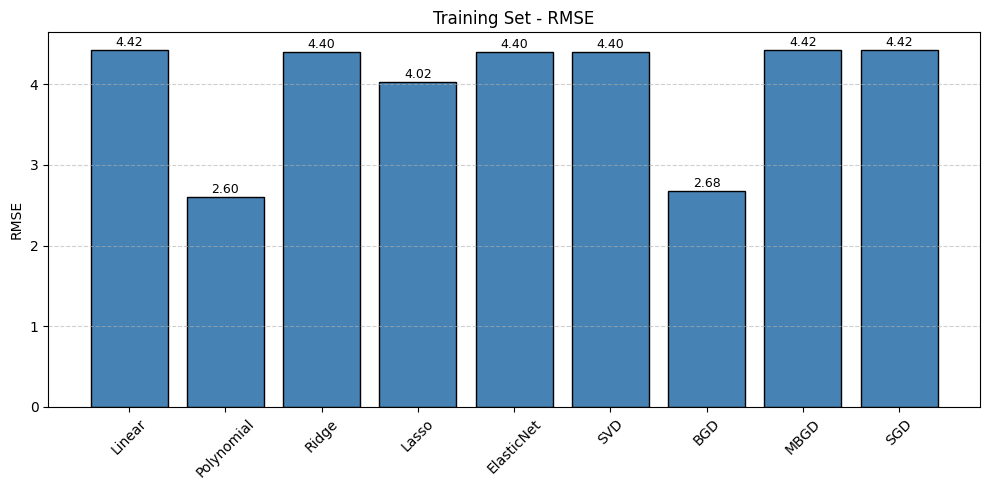

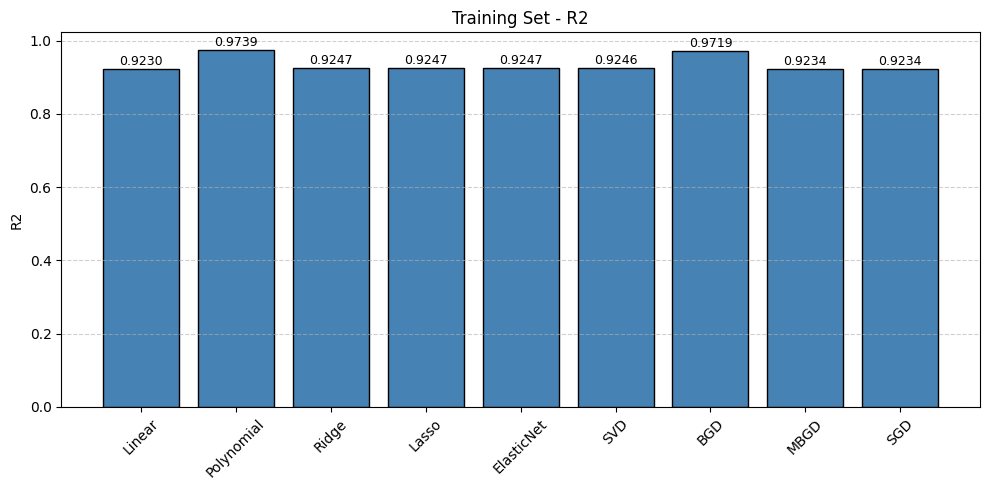

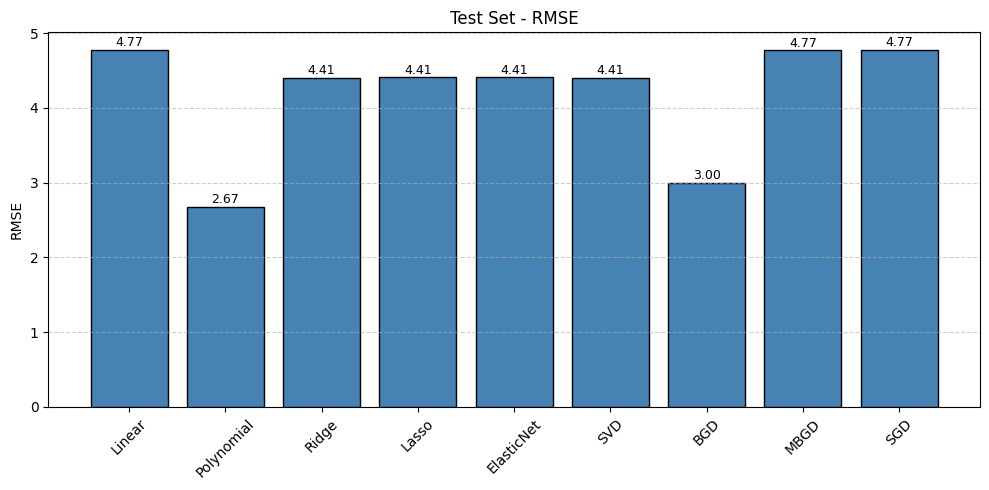

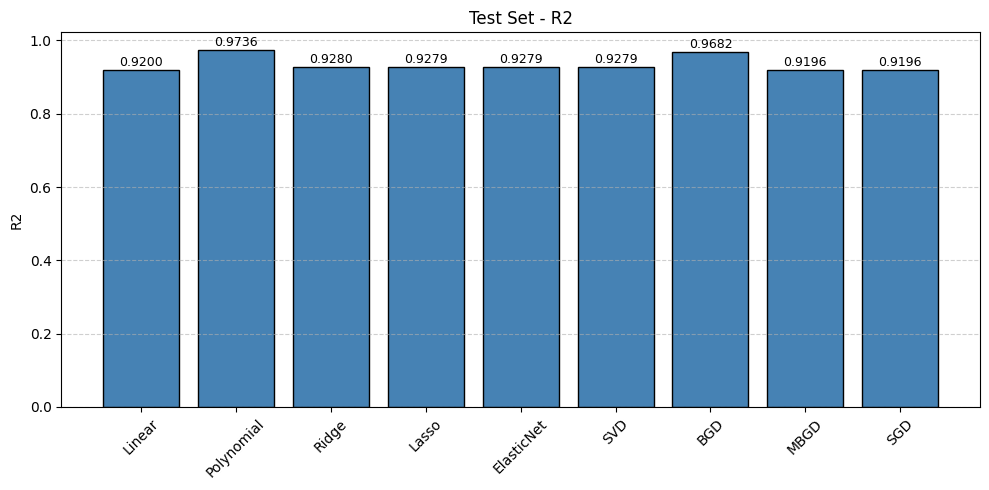

In [ ]:
# Replace these with your **actual values** from the models
models = ['Linear', 'Polynomial', 'Ridge', 'Lasso', 'ElasticNet', 'SVD', 'BGD', 'MBGD', 'SGD']

# Dummy values (replace with actual metrics from your models)
train_metrics = {

    'RMSE': [4.422, 2.6006, 4.4032, 4.024, 4.4042, 4.4030, 2.6772, 4.4218, 4.4218],

    'R2':   [0.923, 0.9739, 0.9247, 0.9247, 0.9247, 0.9246, 0.9719, 0.9234, 0.9234],
}

test_metrics = {

    'RMSE': [4.773, 2.6742, 4.4070, 4.4081, 4.4081, 4.4065, 3.0016, 4.7716, 4.7733],

    'R2':   [0.920, 0.9736, 0.9280, 0.9279, 0.9279, 0.9279, 0.9682, 0.9196, 0.9196],
}

# Convert to DataFrames
train_df = pd.DataFrame(train_metrics, index=models)
test_df = pd.DataFrame(test_metrics, index=models)

# 📊 Plotting function with value labels
def plot_metric_bars(df, title):
    for metric in df.columns:
        plt.figure(figsize=(10, 5))
        bars = plt.bar(df.index, df[metric], color='steelblue', edgecolor='black')

        # Annotate each bar with the metric value
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width() / 2,
                         height + (0.01 if metric != 'R2' else 0.002),
                         f'{height:.4f}' if metric == 'R2' else f'{height:.2f}',
                         ha='center', va='bottom', fontsize=9, color='black')

        plt.ylabel(metric)
        plt.title(f'{title} - {metric}')
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', axis='y', alpha=0.6)
        plt.tight_layout()
        plt.show()

# ✅ Plot for Train and Test separately
plot_metric_bars(train_df, "Training Set")
plot_metric_bars(test_df, "Test Set")
